###  Importing data and performing EDA 

In [ ]:
#Project 5 is a team project. Ali Habibi and Samay Shah contribute to this project equally.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import geopandas as gpd
import plotly.express as px
import descartes
from shapely.geometry import Point, Polygon

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import shapefile as shp


In [2]:
Houston_2019=pd.read_csv("2019Final_May11.csv")
Houston_2019.head()

Business  \
0             Houston Police Department Headquarters   
1                          Houston Police Department   
2                          Houston Police Department   
3  Houston Police Department - Central Patrol Sta...   
4                          Houston Police Department   

                    Category             Component   Latitude  Lifeline  \
0  houston police department  Law Enforce/Security  29.755584         1   
1  houston police department  Law Enforce/Security  29.857023         1   
2  houston police department  Law Enforce/Security  29.727379         1   
3  houston police department  Law Enforce/Security  29.764894         1   
4  houston police department  Law Enforce/Security  29.767038         1   

   Longitude  Source      Lifeline_name  Zipcode  
0 -95.367472  Google  Saftey & Security    77002  
1 -95.539746  Google  Saftey & Security    77040  
2 -95.604769  Google  Saftey & Security    77077  
3 -95.370553  Google  Saftey & Security    77201  
4 -95.368363  Google  Saftey & Security    77201

In [3]:
Houston_2019['Component'].unique()

array(['Law Enforce/Security', 'Search and Rescue', 'Fire Services',
       'Government Services', 'Shelter', 'Food', 'Water Infrastructure',
       'Public Health', 'Fatality Management', 'Fuel', 'Temporary Power',
       'Power', 'Infrastructure', 'Alerts & Warnings',
       'Financial Services', 'Aviation', 'Maritime', 'Pipeline',
       'Mass Transit', 'Highway', 'Railway', 'Facilities'], dtype=object)

In [4]:
# Houston_2019[Houston_2019['Category']=='gas company']

In [5]:
Houston_2019=Houston_2019.rename(columns={'Business':'Business_name','Latitude':"latitude",'Longitude':'longitude',
                                          'Category':'category','Zipcode':'zipcode', 'Lifeline':'lifeline_num',
                                          'Lifeline_name':'lifeline_name'})

Houston_2019.drop(['Component','Source'],axis=1,inplace=True)


In [6]:
columns_order=['Business_name','latitude','longitude','category','zipcode','lifeline_num','lifeline_name']
Houston_2019=Houston_2019[columns_order]
Houston_2019.head()

Business_name   latitude  longitude  \
0             Houston Police Department Headquarters  29.755584 -95.367472   
1                          Houston Police Department  29.857023 -95.539746   
2                          Houston Police Department  29.727379 -95.604769   
3  Houston Police Department - Central Patrol Sta...  29.764894 -95.370553   
4                          Houston Police Department  29.767038 -95.368363   

                    category  zipcode  lifeline_num      lifeline_name  
0  houston police department    77002             1  Saftey & Security  
1  houston police department    77040             1  Saftey & Security  
2  houston police department    77077             1  Saftey & Security  
3  houston police department    77201             1  Saftey & Security  
4  houston police department    77201             1  Saftey & Security

In [7]:
Houston_2021=pd.read_csv("2021Final_May11.csv")


In [8]:
print(Houston_2019.isnull().sum())
print (Houston_2019.shape)

Business_name    0
latitude         0
longitude        0
category         0
zipcode          0
lifeline_num     0
lifeline_name    0
dtype: int64
(1282, 7)


In [9]:
print(Houston_2021.isnull().sum())
print (Houston_2021.shape)

Business_name    0
latitude         0
longitude        0
category         0
lifeline_num     0
lifeline_name    0
Source           0
dtype: int64
(1907, 7)


In [10]:
H_cat_2019=Houston_2019['category'].unique()
H_cat_2021=Houston_2021['category'].unique()
[cat for cat in H_cat_2019 if cat not in H_cat_2021]

[]

In [11]:
Houston_2021['category'].unique()       

array(['houston police department', 'houston police organization',
       'houston emergency management', 'fire department',
       'government services', 'animalshelters', 'communitycenters',
       'homelessshelters', 'waterpurification', 'foodbanks',
       'waterdelivery', 'watersuppliers', 'counciling and mental health',
       'hospitals', 'emergencyrooms', 'urgent_care', 'cremationservices',
       'Fuel supplier', 'colonial pipeline', 'gas company',
       'Electrical equipment supplier', 'Electrical substation',
       'power plant', 'nuclear power plant', 'houston cell towers',
       'houston airport', 'houston port', 'houston pipeline',
       'hazardous waste', 'stadiumsarenas', 'fooddeliveryservices',
       'waterstores', 'medcenters', 'c_and_mh', 'homehealthcare',
       'servicestations', 'utilities', 'electricitysuppliers',
       'radiostations', 'banks', 'televisionstations', 'buses', 'towing',
       'publictransport', 'roadsideassist', 'trainstations',
       'met

### EDA Analysis

In [12]:
numeric_cat_2019=Houston_2019['lifeline_num'].value_counts(normalize=True)
numeric_cat_2021=Houston_2021['lifeline_num'].value_counts(normalize=True)

In [13]:
index=np.arange(1,8)
H_2019_values=list(numeric_cat_2019.sort_index())

H_2021_values=list(numeric_cat_2021.sort_index())

In [14]:
Houston_2019['lifeline_name'].unique()

array(['Saftey & Security', 'Food, water, sheltering',
       'Health and medical', 'Energy', 'Hazardous Material',
       'Communication', 'Transportation'], dtype=object)

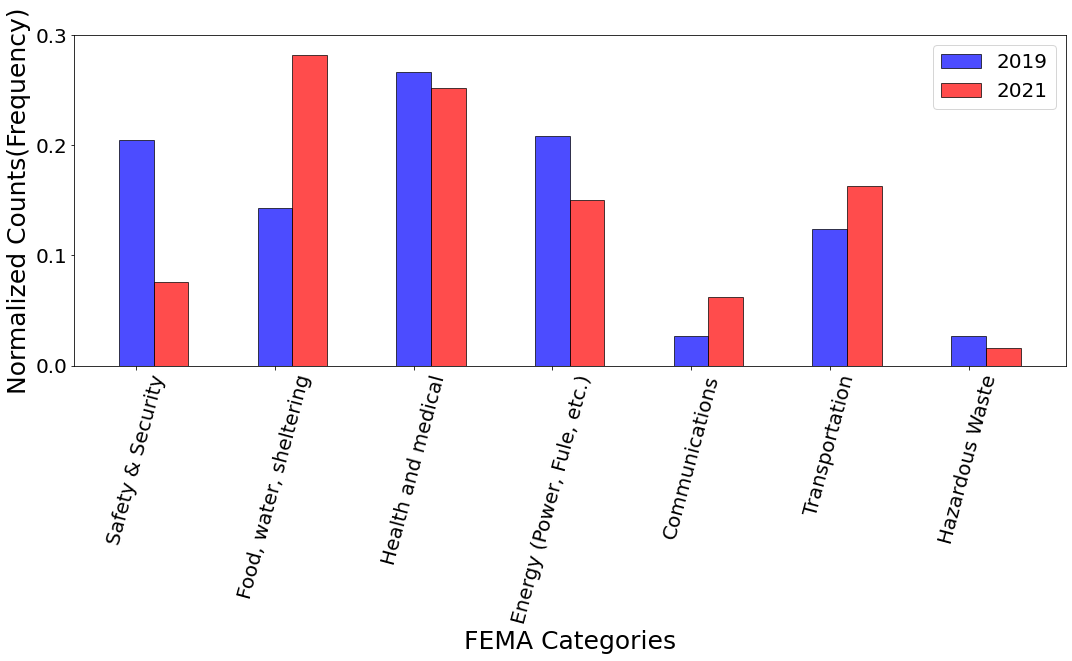

In [16]:
w=0.25
X=['Safety & Security', 'Food, water, sheltering', 'Health and medical', 'Energy (Power, Fule, etc.)',
   'Communications', 'Transportation', 'Hazardous Waste']
plt.figure(figsize=(15,9))

H_2019=plt.bar(index,H_2019_values,color='blue',width=w,edgecolor='black',alpha=0.7)
H_2021=plt.bar(index+w,H_2021_values,color='red',width=w,edgecolor='black',alpha=0.7)
plt.xticks(index,X,fontsize=20,rotation=75)
plt.yticks(np.arange(0, 0.35, step=0.1),fontsize=20)
plt.xlabel('FEMA Categories',fontsize=25)
plt.ylabel('Normalized Counts(Frequency)',fontsize=25)
plt.legend((H_2019,H_2021),('2019','2021'),ncol=1,fontsize=20,loc='best',markerscale=3)
plt.tight_layout()
plt.savefig("Final_images/Comparison_2019_2021.jpg", dpi=600);

In [17]:
def subcat(lifeline_num,FEMA_category,step_size):
    A=pd.DataFrame(Houston_2019.loc[Houston_2019['lifeline_num']==lifeline_num,['category']].value_counts(normalize=True),
                   columns=['counts']).reset_index().sort_values('category')
    param_2019=A.shape[0]
    
    B=pd.DataFrame(Houston_2021.loc[Houston_2021['lifeline_num']==lifeline_num,['category']].value_counts(normalize=True),
                   columns=['counts']).reset_index().sort_values('category')
    param_2021=B.shape[0]
    
   
    plt.figure(figsize=(10,10))
    H_life_2019_plt=plt.bar(np.arange(param_2019),A['counts'],color='navy',width=0.3,edgecolor='black')
    H_life_2021_plt=plt.bar(np.arange(param_2021)+0.31,B['counts'],color='deeppink',width=0.3,edgecolor='black')
    
    plt.xticks(np.arange(param_2019),A['category'],fontsize=15,rotation=75)
    
    plt.legend((H_life_2019_plt,H_life_2021_plt),('2019','2021'),ncol=1,fontsize=20,loc='best',markerscale=3)
    plt.yticks(np.arange(0, np.round(max(max(A['counts']),max(B['counts'])),2)+0.02,
                         step=step_size),fontsize=15)
    
    plt.xlabel('Subcategories for '+FEMA_category,fontsize=25)
    plt.ylabel('Normalized Counts(Frequency)',fontsize=25)
    plt.tight_layout()
    plt.savefig('Final_images/Subcategories for '+str(lifeline_num), dpi=600);    


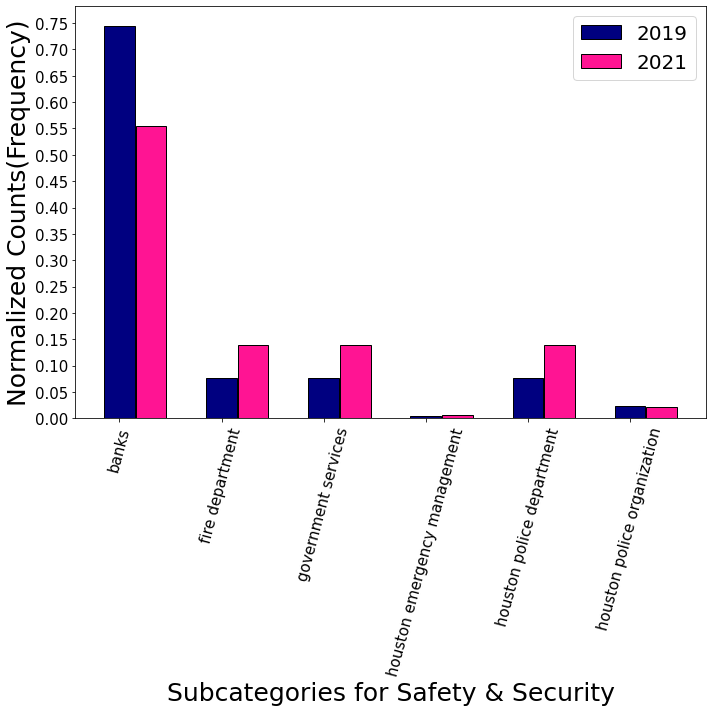

In [18]:
subcat(1,'Safety & Security',0.05)

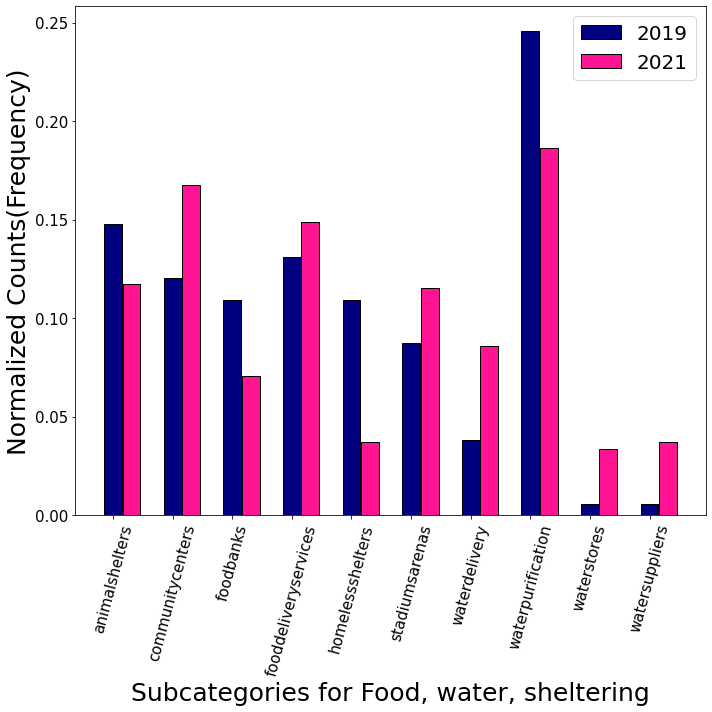

In [19]:
subcat(2,'Food, water, sheltering',0.05)

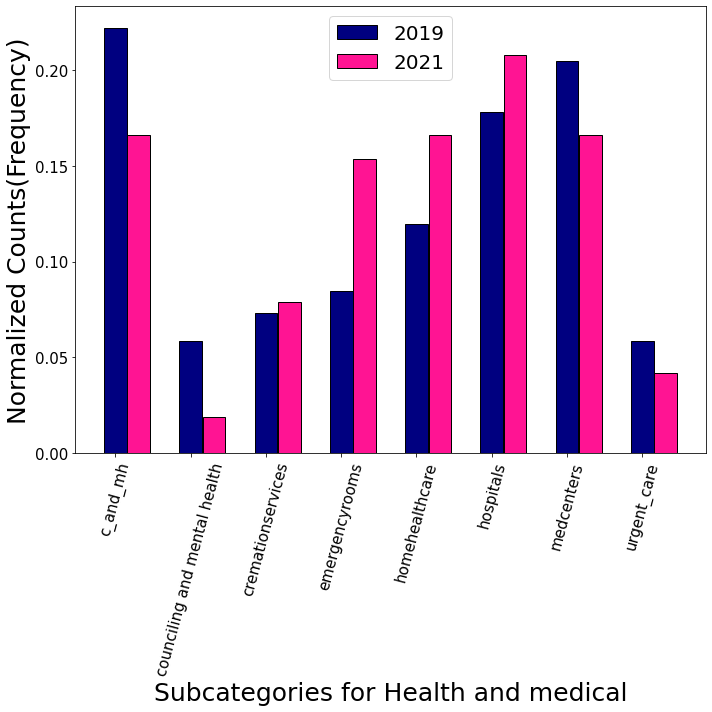

In [20]:
subcat(3,'Health and medical',0.05)

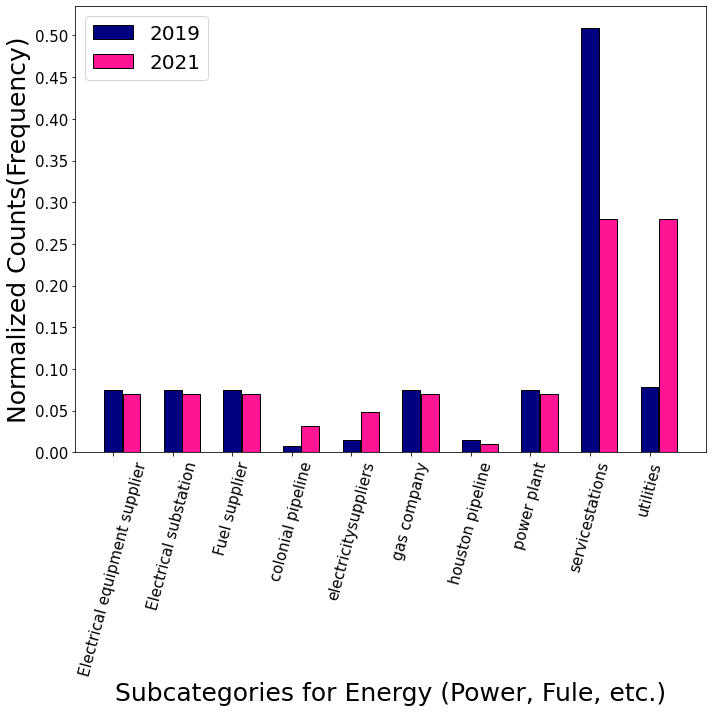

In [21]:
subcat(4,'Energy (Power, Fule, etc.)',0.05)

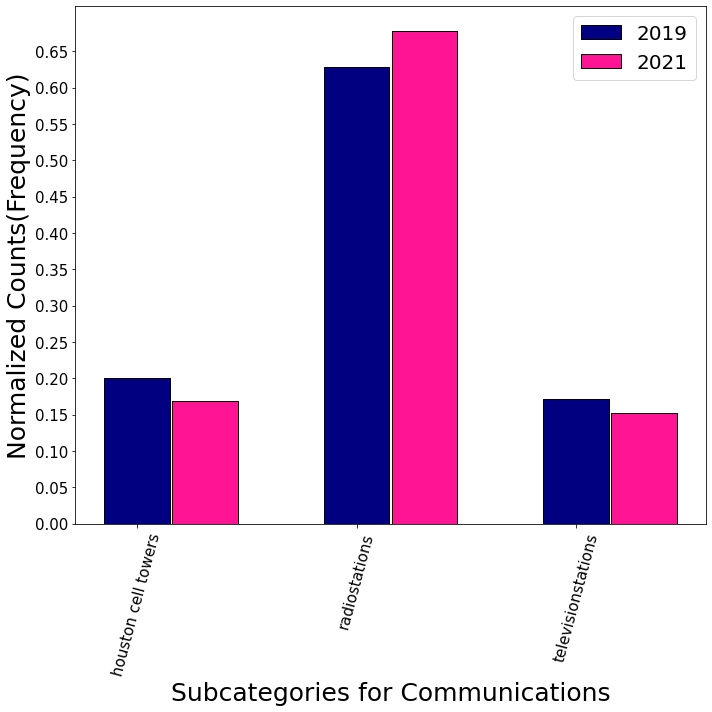

In [22]:
subcat(5,'Communications',0.05)

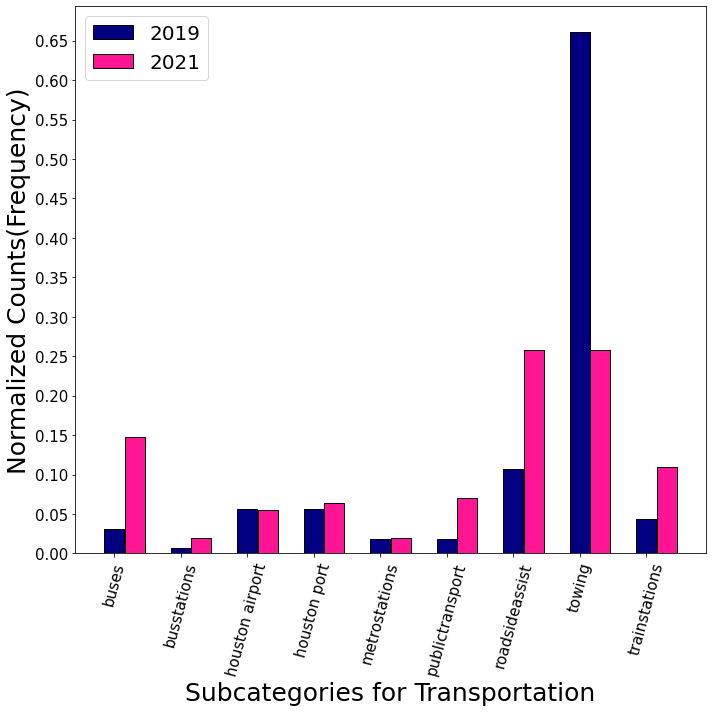

In [23]:
subcat(6,'Transportation',0.05)

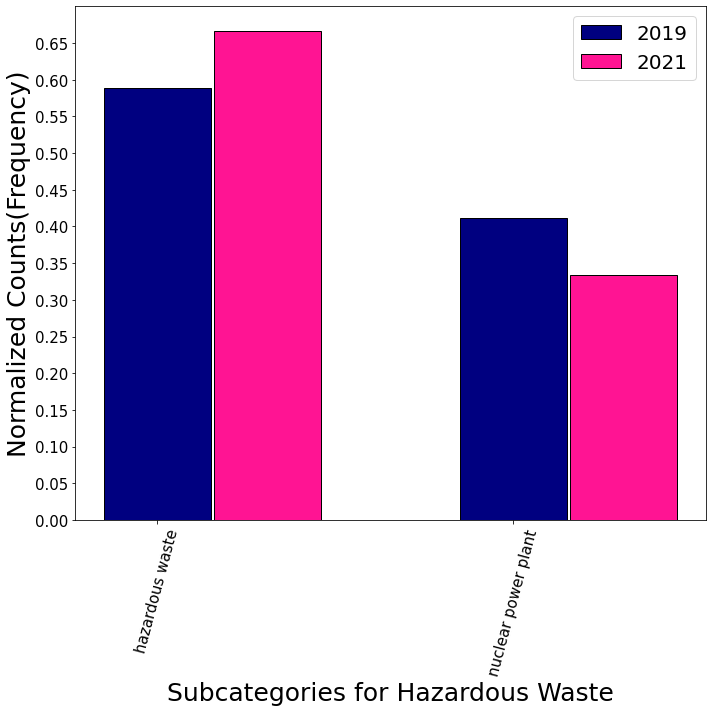

In [24]:
subcat(7,'Hazardous Waste',0.05)

In [25]:
Houston_2019plus=pd.get_dummies(Houston_2019,columns=['lifeline_name'])
Houston_2021plus=pd.get_dummies(Houston_2021,columns=['lifeline_name'])

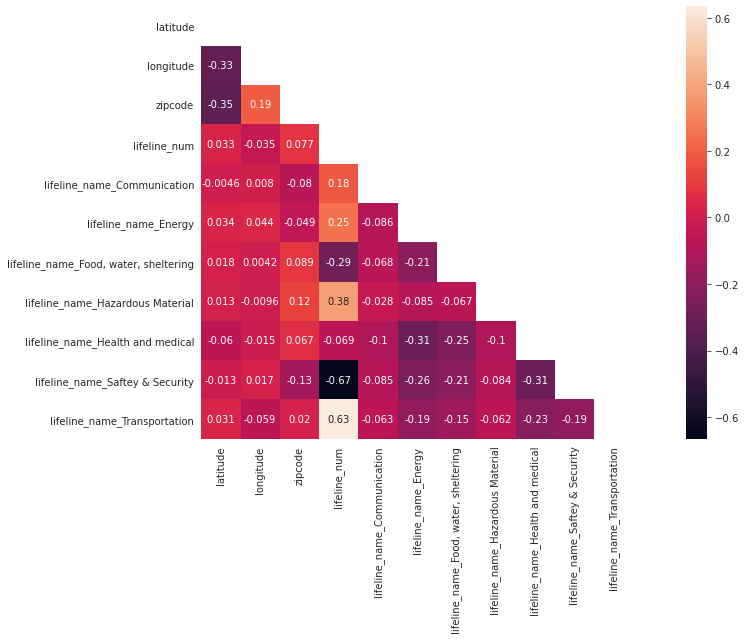

In [26]:
plt.figure(figsize=(15,9))
corr=Houston_2019plus.corr()
mask=np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    sns.heatmap(corr,cbar=True,square=True, mask=mask, annot=True)
plt.tight_layout()
plt.savefig('Final_images/Heat_map_2019', dpi=600);

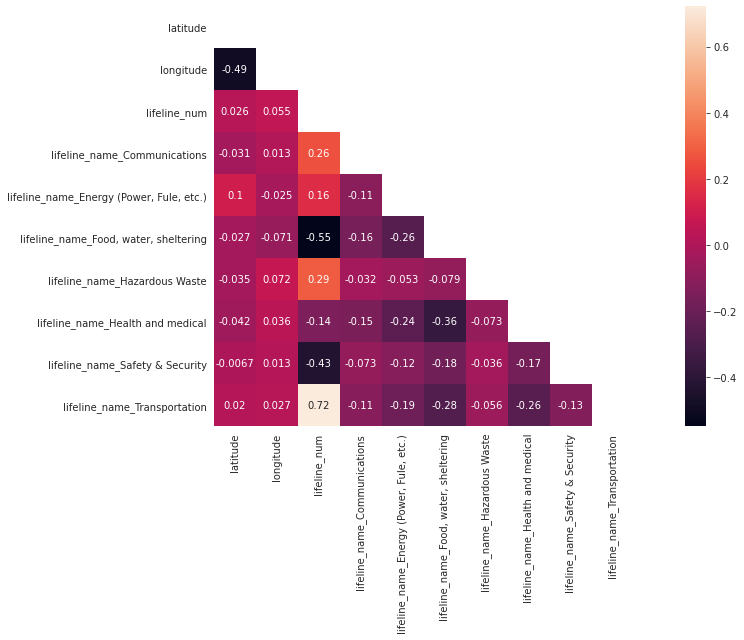

In [27]:
plt.figure(figsize=(15,9))
corr=Houston_2021plus.corr()
mask=np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    sns.heatmap(corr,cbar=True,square=True, mask=mask, annot=True)
plt.tight_layout()
plt.savefig('Final_images/Heat_map_2021', dpi=600);

### Distribution of businesses in Houston using Geopandas

In [28]:
crs = {'init': 'epsg:4326'}
Houston_2019_geo=gpd.GeoDataFrame(Houston_2019,geometry=gpd.points_from_xy(
Houston_2019.longitude,Houston_2019.latitude),crs=crs)

C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [29]:
Houston_2021_geo=gpd.GeoDataFrame(Houston_2021,geometry=gpd.points_from_xy(
Houston_2021.longitude,Houston_2021.latitude))

In [30]:
# houston_map = gpd.read_file('Houston_City_Limit/Houston_City_Limit.shp')
houston_map = gpd.read_file('COH_CITY_COUNCIL_DISTRICTS/COH_CITY_COUNCIL_DISTRICTS.shp')
houston_map

OBJECTID DISTRICT                 MEMBER         PHONE  YEAR  \
0     176801        C            ABBIE KAMIN  832-393-3004  2020   
1     176802        A               AMY PECK  832-393-3010  2020   
2     176803        H         KARLA CISNEROS  832-393-3003  2015   
3     176804        D  CAROLYN EVANS-SHABAZZ  832-393-3001  2020   
4     176805        E           DAVID MARTIN  832-393-3008  2013   
5     176806        I        ROBERT GALLEGOS  832-393-3011  2013   
6     176807        F      TIFFANY D. THOMAS  832-393-3002  2020   
7     176808        K    MARTHA CASTEX-TATUM  832-393-3016  2018   
8     176809        G            GREG TRAVIS  832-393-3007  2015   
9     176812        B            JERRY DAVIS  832-393-3009  2011   
10    176813        J         EDWARD POLLARD  832-393-3015  2020   

                                  GlobalID created_us  created_da last_edite  \
0   {667D1560-B330-47DF-A575-04C322AC80E7}    E161669  2017-10-17    E133026   
1   {B0560D93-D0CA-498A-A67E-839A0CC7ABAE}    E161669  2017-10-17    E133026   
2   {1A2C870E-06BB-4557-B0C2-207EB74521C8}    E161669  2017-10-17    E161669   
3   {7ACD81DB-9B8D-4371-954A-66C49FC171E7}    E161669  2017-10-17    E133026   
4   {89D80C0E-4889-4DB7-A9CC-304EE8A2B77C}    E161669  2017-10-17    E167112   
5   {C8FE2D76-DE91-46DD-BAE1-04581CAA601F}    E161669  2017-10-17    E161669   
6   {C3C344E1-4DDC-4FB2-BFF1-AE1A4F1850D9}    E161669  2017-10-17    E133026   
7   {AD3FA5B4-07AC-4C98-98BD-E63ADA466034}    E161669  2017-10-17    E161669   
8   {9A286EB9-F16B-4B2E-8B4A-F0E885DBC804}    E161669  2017-10-17    E161669   
9   {19E5EE10-3198-4AEB-A029-F7E71DD83844}    E161669  2017-11-14    E161669   
10  {68C2B64F-A72C-4FC2-BE95-8ED492A725F4}    E133026  2017-11-20    E133026   

    last_edi_1    ShapeSTAre    ShapeSTLen  \
0   2019-12-31  1.080513e+09  3.311132e+05   
1   2019-12-31  2.587485e+09  3.596825e+06   
2   2019-04-10  1.050232e+09  3.416497e+05   
3   2019-12-31  1.744516e+09  3.724130e+05   
4   2019-12-18  3.665798e+09  1.672008e+06   
5   2017-10-17  1.411232e+09  3.778280e+05   
6   2019-12-31  1.485759e+09  1.249421e+06   
7   2019-01-08  1.319406e+09  3.880939e+05   
8   2017-10-17  1.013708e+09  3.194560e+05   
9   2019-04-10  2.814054e+09  1.981761e+06   
10  2019-12-31  5.446187e+08  1.553310e+05   

                                             geometry  
0   POLYGON ((-95.46995 29.84515, -95.46836 29.842...  
1   MULTIPOLYGON (((-95.46742 29.88549, -95.46767 ...  
2   MULTIPOLYGON (((-95.14380 29.54166, -95.14380 ...  
3   POLYGON ((-95.32964 29.70575, -95.32828 29.701...  
4   MULTIPOLYGON (((-95.16833 29.82534, -95.16778 ...  
5   MULTIPOLYGON (((-95.21277 29.82599, -95.21275 ...  
6   MULTIPOLYGON (((-95.75154 29.75905, -95.75154 ...  
7   MULTIPOLYGON (((-95.40196 29.70076, -95.40057 ...  
8   POLYGON ((-95.45734 29.78269, -95.45706 29.782...  
9   MULTIPOLYGON (((-95.47821 29.99479, -95.47809 ...  
10  POLYGON ((-95.47066 29.73921, -95.47062 29.738...

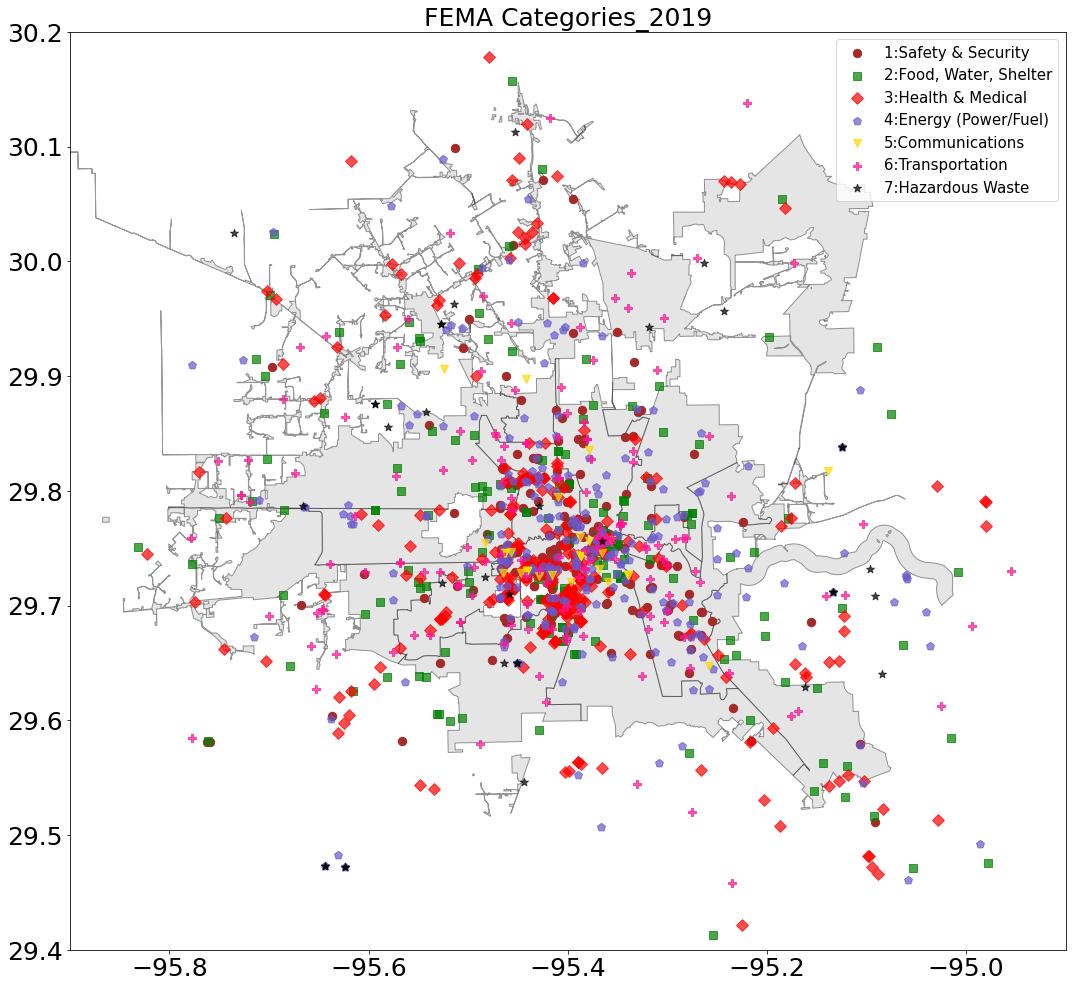

In [31]:
# This section of the code is extracted from DSI-ATL Students (Alexander Harmon) 

fig,ax = plt.subplots(figsize=(15,15))
houston_map.plot(ax=ax,alpha=0.4, color='silver',edgecolor='black')
# ctx.add_basemap(ax)
Houston_2019_geo[Houston_2019_geo['lifeline_num'] == 1.0].plot(ax = ax, marker='o', markersize=70,color='brown',
                                            alpha = 1, label='1:Safety & Security')
Houston_2019_geo[Houston_2019_geo['lifeline_num'] == 2.0].plot(ax = ax, marker='s', markersize=70,color='green', 
                                           alpha = 0.7, label='2:Food, Water, Shelter')
Houston_2019_geo[Houston_2019_geo['lifeline_num'] == 3.0].plot(ax = ax, marker='D',markersize=70,color='red', 
                                           alpha = 0.7, label='3:Health & Medical')
Houston_2019_geo[Houston_2019_geo['lifeline_num'] == 4.0].plot(ax = ax, marker='p', markersize=70, color='slateblue',
                                           alpha = 0.7, label='4:Energy (Power/Fuel)')
Houston_2019_geo[Houston_2019_geo['lifeline_num'] == 5.0].plot(ax = ax, marker='v', markersize=70,color='gold', 
                                           alpha = 0.7, label='5:Communications')
Houston_2019_geo[Houston_2019_geo['lifeline_num'] == 6.0].plot(ax = ax, marker='P', markersize=70, color='deeppink',
                                           alpha = 0.7, label='6:Transportation')
Houston_2019_geo[Houston_2019_geo['lifeline_num'] == 7.0].plot(ax = ax, marker='*', markersize=70, color='black',
                                           alpha = 0.7, label='7:Hazardous Waste')
plt.legend(prop={'size':15})
plt.xlim(-95.9, -94.9)
plt.ylim(29.4, 30.2)
plt.title('FEMA Categories_2019', fontsize=25)
plt.tight_layout()
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
#plt.axis('off')
plt.tight_layout()
plt.savefig('Final_images/Geopandas_2019', dpi=600)


In [33]:
# fig,ax = plt.subplots(figsize=(10,10))
# houston_map.plot(ax=ax,alpha=0.4, color='silver',edgecolor='black')
# plt.legend(prop={'size':15})
# plt.xlim(-95.9, -94.9)
# plt.ylim(29.4, 30.2)
# plt.tight_layout()
# plt.xticks(fontsize=25)
# plt.yticks(fontsize=25);

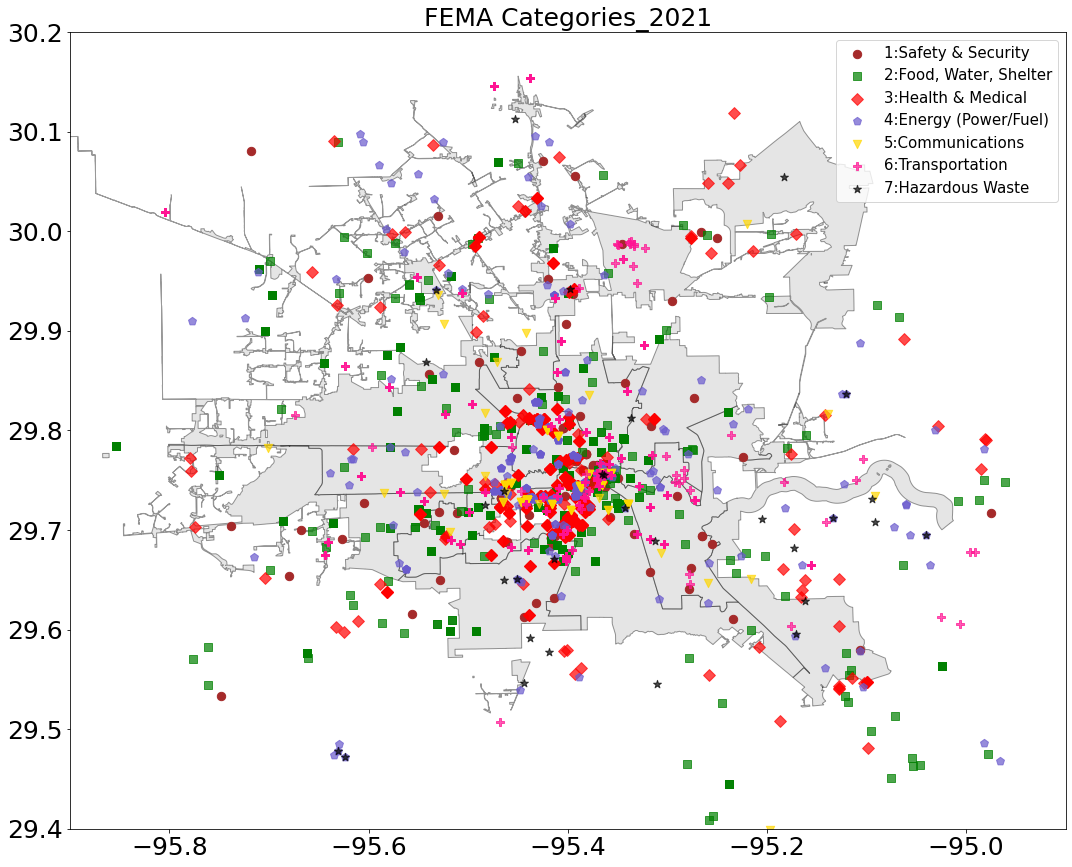

In [34]:
fig,ax = plt.subplots(figsize=(15,15))
houston_map.plot(ax=ax,alpha=0.4, color='silver',edgecolor='black')
Houston_2021_geo[Houston_2021_geo['lifeline_num'] == 1.0].plot(ax = ax, marker='o', markersize=70,color='brown',
                                            alpha = 1, label='1:Safety & Security')
Houston_2021_geo[Houston_2021_geo['lifeline_num'] == 2.0].plot(ax = ax, marker='s', markersize=70,color='green', 
                                           alpha = 0.7, label='2:Food, Water, Shelter')
Houston_2021_geo[Houston_2021_geo['lifeline_num'] == 3.0].plot(ax = ax, marker='D',markersize=70,color='red', 
                                           alpha = 0.7, label='3:Health & Medical')
Houston_2021_geo[Houston_2021_geo['lifeline_num'] == 4.0].plot(ax = ax, marker='p', markersize=70, color='slateblue',
                                           alpha = 0.7, label='4:Energy (Power/Fuel)')
Houston_2021_geo[Houston_2021_geo['lifeline_num'] == 5.0].plot(ax = ax, marker='v', markersize=70,color='gold', 
                                           alpha = 0.7, label='5:Communications')
Houston_2021_geo[Houston_2021_geo['lifeline_num'] == 6.0].plot(ax = ax, marker='P', markersize=70, color='deeppink',
                                           alpha = 0.7, label='6:Transportation')
Houston_2021_geo[Houston_2021_geo['lifeline_num'] == 7.0].plot(ax = ax, marker='*', markersize=70, color='black',
                                           alpha = 0.7, label='7:Hazardous Waste')
plt.legend(prop={'size':15})
plt.xlim(-95.9, -94.9)
plt.ylim(29.4, 30.2)
plt.title('FEMA Categories_2021',fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.tight_layout()
#plt.axis('off')
plt.tight_layout()
plt.savefig('Final_images/Geopandas_2021', dpi=600);


### Comprehensive 2021 dataset

In [35]:
Houston_2021_new=pd.read_csv("allcategories_yelp_2021.csv")
Houston_2021_new.head()

Business_name   latitude  longitude  zipcode  \
0  Total Maintenance Solutions  29.672780 -95.446270    77025   
1                 Airgas Store  29.847488 -95.523142    77040   
2                 Airgas Store  29.682143 -95.350282    77033   
3                     PSG Safe  29.724050 -95.511270    77069   
4    Advanced Geodetic Surveys  29.348105 -95.643005    77430   

          category  lifeline_num      lifeline_name Source  
0  safetyequipment             1  Safety & Security   Yelp  
1  safetyequipment             1  Safety & Security   Yelp  
2  safetyequipment             1  Safety & Security   Yelp  
3  safetyequipment             1  Safety & Security   Yelp  
4  safetyequipment             1  Safety & Security   Yelp

In [36]:
Houston_2021_new_geo=gpd.GeoDataFrame(Houston_2021_new,geometry=gpd.points_from_xy(
Houston_2021_new.longitude,Houston_2021_new.latitude),crs=crs)

C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [37]:
list(Houston_2021_new['lifeline_num'].value_counts())


[1161, 921, 839, 494, 434, 326, 90]

In [38]:
# Houston_2021_new.loc[Houston_2021_new['lifeline_num']==3,['category']].value_counts()

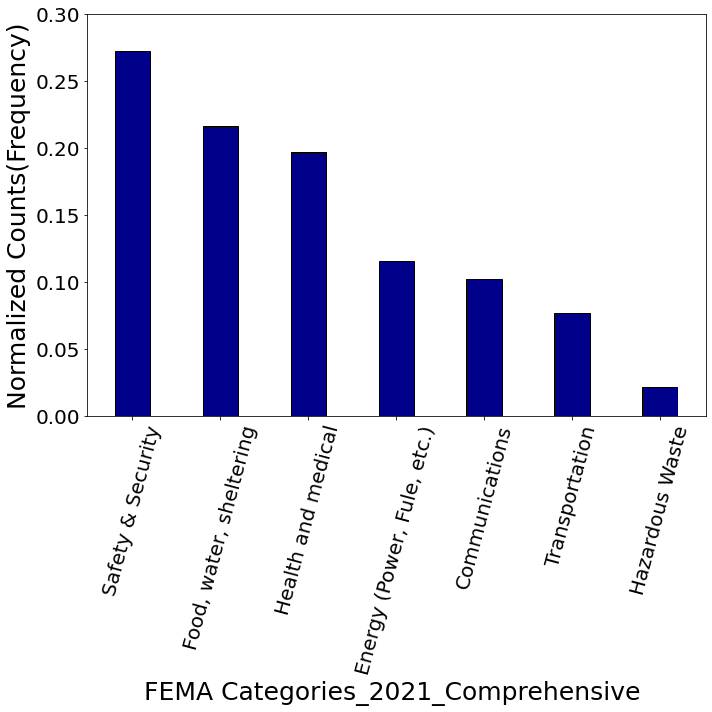

In [39]:
C=list(Houston_2021_new['lifeline_num'].value_counts(normalize=True))
index=np.arange(1,8)
X=['Safety & Security', 'Food, water, sheltering', 'Health and medical', 'Energy (Power, Fule, etc.)',
   'Communications', 'Transportation', 'Hazardous Waste']
plt.figure(figsize=(10,10))
H_2021_new=plt.bar(index,C,color='darkblue',width=0.4,edgecolor='black',alpha=1,label='2021_comprehensive')
plt.xticks(index,X,fontsize=20,rotation=75)
plt.yticks(np.arange(0, 0.32, step=0.05),fontsize=20)  
# plt.legend(ncol=2,fontsize=20,loc='best')
    
plt.xlabel('FEMA Categories_2021_Comprehensive ',fontsize=25)
plt.ylabel('Normalized Counts(Frequency)',fontsize=25)
plt.tight_layout()
plt.savefig("Final_images/Comprehensive_2021", dpi=600);
    

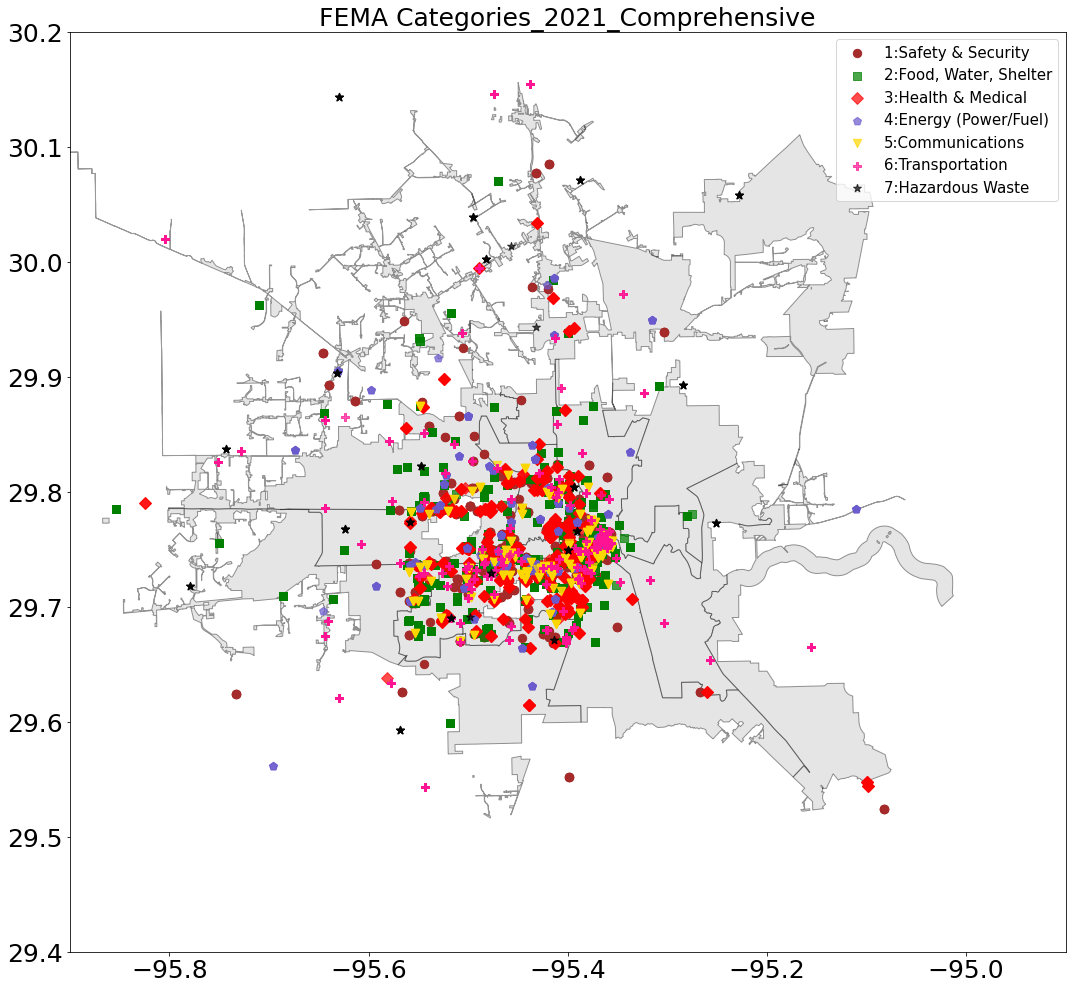

In [40]:
fig,ax = plt.subplots(figsize=(15,15))
houston_map.plot(ax=ax,alpha=0.4, color='silver',edgecolor='black')
Houston_2021_new_geo[Houston_2021_new_geo['lifeline_num'] == 1.0].plot(ax = ax, marker='o', markersize=70,color='brown',
                                            alpha = 1, label='1:Safety & Security')
Houston_2021_new_geo[Houston_2021_new_geo['lifeline_num'] == 2.0].plot(ax = ax, marker='s', markersize=70,color='green', 
                                           alpha = 0.7, label='2:Food, Water, Shelter')
Houston_2021_new_geo[Houston_2021_new_geo['lifeline_num'] == 3.0].plot(ax = ax, marker='D',markersize=70,color='red', 
                                           alpha = 0.7, label='3:Health & Medical')
Houston_2021_new_geo[Houston_2021_new_geo['lifeline_num'] == 4.0].plot(ax = ax, marker='p', markersize=70, color='slateblue',
                                           alpha = 0.7, label='4:Energy (Power/Fuel)')
Houston_2021_new_geo[Houston_2021_new_geo['lifeline_num'] == 5.0].plot(ax = ax, marker='v', markersize=70,color='gold', 
                                           alpha = 0.7, label='5:Communications')
Houston_2021_new_geo[Houston_2021_new_geo['lifeline_num'] == 6.0].plot(ax = ax, marker='P', markersize=70, color='deeppink',
                                           alpha = 0.7, label='6:Transportation')
Houston_2021_new_geo[Houston_2021_new_geo['lifeline_num'] == 7.0].plot(ax = ax, marker='*', markersize=70, color='black',
                                           alpha = 0.7, label='7:Hazardous Waste')
plt.legend(prop={'size':15})
plt.xlim(-95.9, -94.9)
plt.ylim(29.4, 30.2)
plt.title('FEMA Categories_2021_Comprehensive',fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.tight_layout()
#plt.axis('off')
plt.tight_layout()
plt.savefig('Final_images/Geopandas_2021_Comprehensive', dpi=600);


## Defining dataframes for clustering  

In [41]:
X=['Safety & Security', 'Food, water, sheltering', 'Health and medical', 'Energy (Power, Fule, etc.)',
   'Communications', 'Transportation', 'Hazardous Waste']

### Year 2019

In [42]:
Houston_2019_geo[Houston_2019_geo['lifeline_num']==2]['category'].value_counts()

waterpurification       45
animalshelters          27
fooddeliveryservices    24
communitycenters        22
foodbanks               20
homelessshelters        20
stadiumsarenas          16
waterdelivery            7
waterstores              1
watersuppliers           1
Name: category, dtype: int64

In [43]:
clus_2019_2=Houston_2019_geo[(Houston_2019_geo['lifeline_num']==2) &
                           (Houston_2019_geo['category'].isin(['waterpurification',
                                                               'animalshelters','fooddeliveryservices'
                                                               ,'communitycenters','foodbanks','homelessshelters',
                                                               'stadiumsarenas']))][['latitude','longitude']]

In [44]:
Houston_2019_geo[Houston_2019_geo['lifeline_num']==3]['category'].value_counts()

c_and_mh                        76
medcenters                      70
hospitals                       61
homehealthcare                  41
emergencyrooms                  29
cremationservices               25
counciling and mental health    20
urgent_care                     20
Name: category, dtype: int64

In [45]:
clus_2019_3=Houston_2019_geo[(Houston_2019_geo['lifeline_num']==3)][['latitude','longitude']]

In [46]:
Houston_2019_geo[Houston_2019_geo['lifeline_num']==6]['category'].value_counts()

towing             105
roadsideassist      17
houston port         9
houston airport      9
trainstations        7
buses                5
publictransport      3
metrostations        3
busstations          1
Name: category, dtype: int64

In [47]:
clus_2019_6=Houston_2019_geo[(Houston_2019_geo['lifeline_num']==6)][['latitude','longitude']]

### Year 2021 

In [48]:
Houston_2021_geo[Houston_2021_geo['lifeline_num']==2]['category'].value_counts()
clus_2021_2=Houston_2021_geo[(Houston_2021_geo['lifeline_num']==2)][['latitude','longitude']]

In [49]:
Houston_2021_geo[Houston_2021_geo['lifeline_num']==3]['category'].value_counts()
clus_2021_3=Houston_2021_geo[(Houston_2021_geo['lifeline_num']==3)][['latitude','longitude']]

In [50]:
Houston_2021_geo[Houston_2021_geo['lifeline_num']==6]['category'].value_counts()
clus_2021_6=Houston_2021_geo[(Houston_2021_geo['lifeline_num']==6)][['latitude','longitude']]

### Year 2021 Comprehensive

In [51]:
Houston_2021_new_geo[Houston_2021_new_geo['lifeline_num']==2]['category'].value_counts()
clus_2021_new_2=Houston_2021_new_geo[(Houston_2021_new_geo['lifeline_num']==2)][['latitude','longitude']]

In [52]:
Houston_2021_new_geo[Houston_2021_new_geo['lifeline_num']==3]['category'].value_counts()
clus_2021_new_3=Houston_2021_new_geo[(Houston_2021_new_geo['lifeline_num']==3)][['latitude','longitude']]

In [53]:
Houston_2021_new_geo[Houston_2021_new_geo['lifeline_num']==6]['category'].value_counts()
clus_2021_new_6=Houston_2021_new_geo[(Houston_2021_new_geo['lifeline_num']==6)][['latitude','longitude']]

## KMeans Clustering

In [54]:
def KMean_clust(df,k,title='title'):
    ss=StandardScaler()
    df_sc=ss.fit_transform(df)
    km=KMeans(n_clusters=k)
    km.fit(df_sc)
    print(f'silhouette_score for {title} is: {silhouette_score(df_sc,km.labels_)}')
    
    fig,ax = plt.subplots(figsize=(15,15))
    houston_map.plot(ax=ax,alpha=0.4, color='silver',edgecolor='black')
    plt.scatter(df.longitude,df.latitude,c=km.labels_,cmap='prism',s=100)
    plt.xlim(-95.9, -94.9)
    plt.ylim(29.4, 30.2)
    plt.title(title,fontsize=25)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.tight_layout()
    #plt.axis('off')
    plt.tight_layout()
    plt.savefig('Final_images/'+title, dpi=600);

silhouette_score for KMeans_Food, water, sheltering_2019 is: 0.37960369253746284


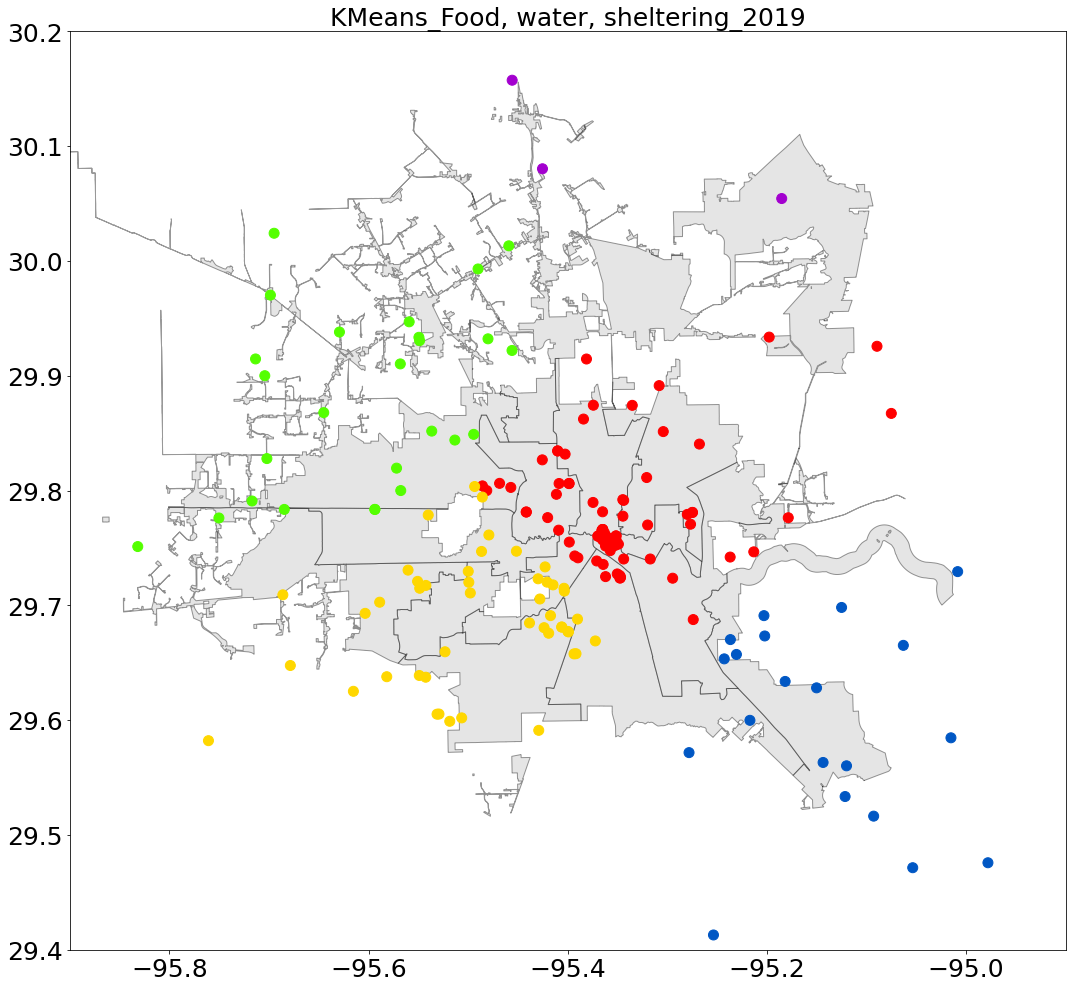

In [55]:
KMean_clust(clus_2019_2,5,title='KMeans_Food, water, sheltering_2019')

silhouette_score for KMeans_Health and medical_2019 is: 0.5787100604280614


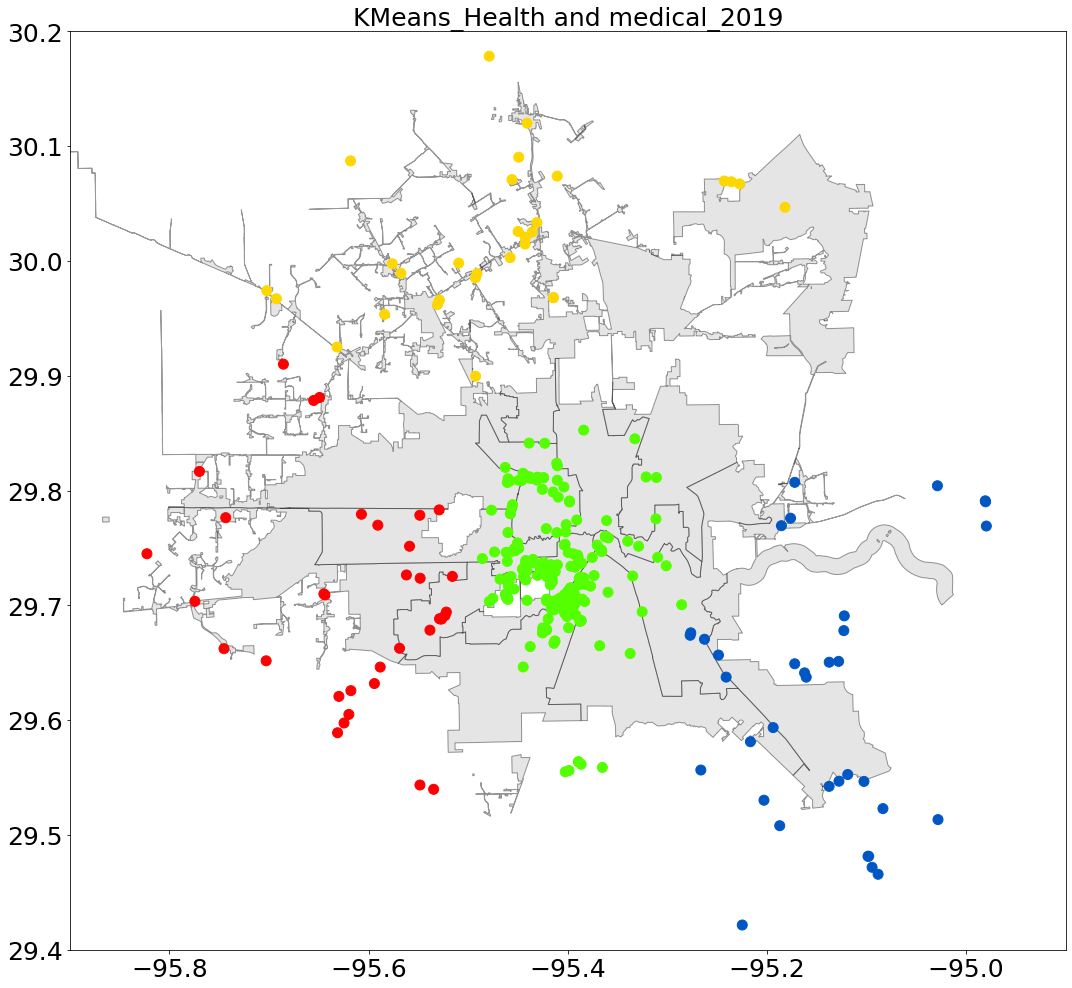

In [56]:
KMean_clust(clus_2019_3,5,title='KMeans_Health and medical_2019')

silhouette_score for KMeans_Transportation_2019 is: 0.3758382766313576


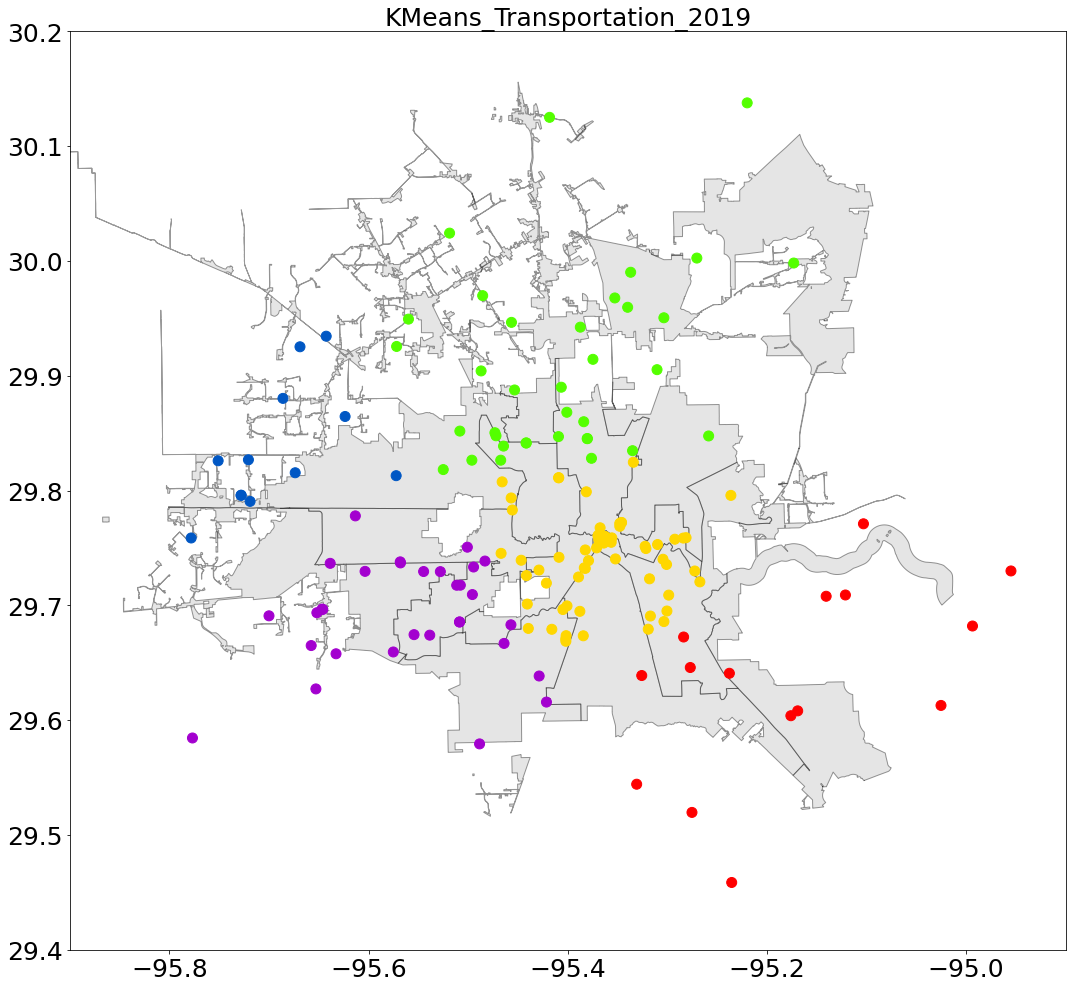

In [57]:
KMean_clust(clus_2019_6,5,title='KMeans_Transportation_2019')

silhouette_score for KMeans_Food, water, sheltering_2021 is: 0.49957980409056046


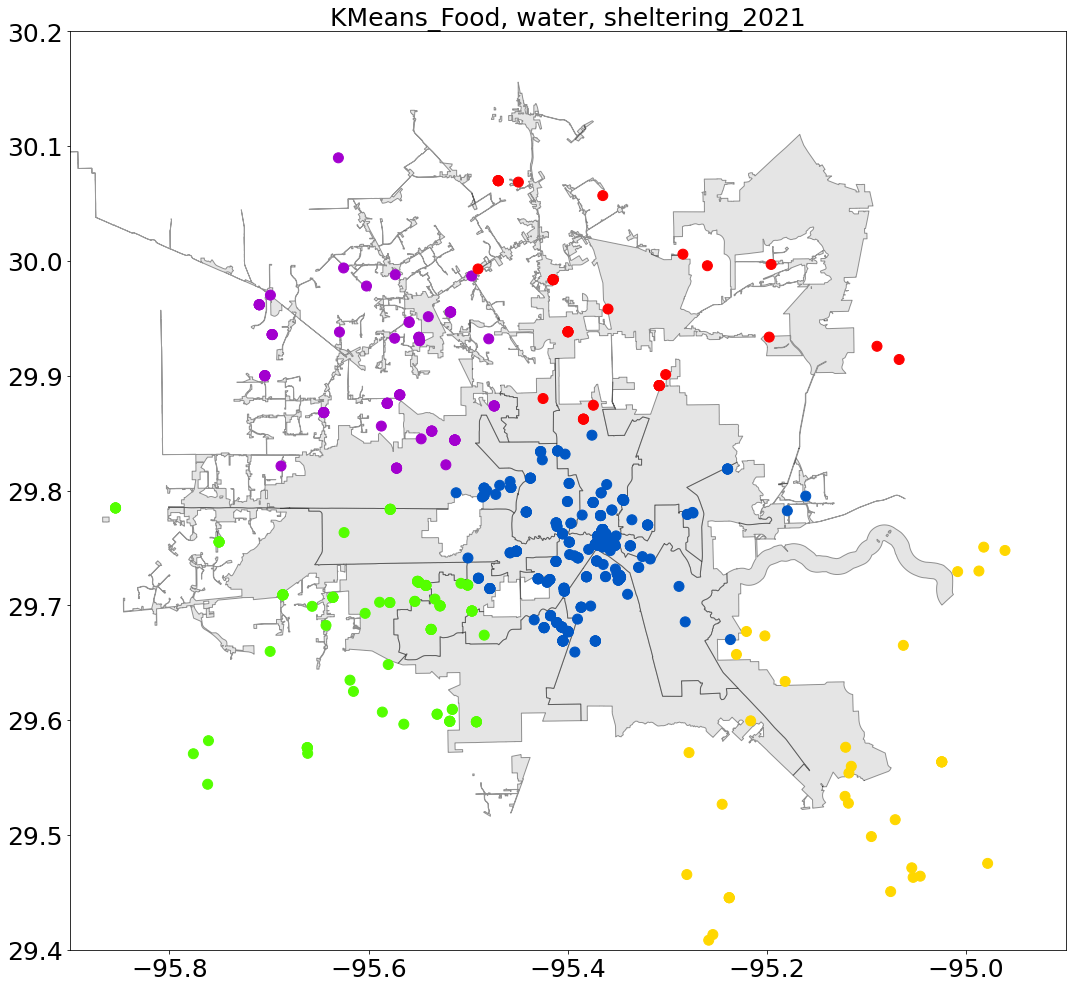

In [58]:
KMean_clust(clus_2021_2,5,title='KMeans_Food, water, sheltering_2021')

silhouette_score for KMeans_Health and medical_2021 is: 0.44327419779728405


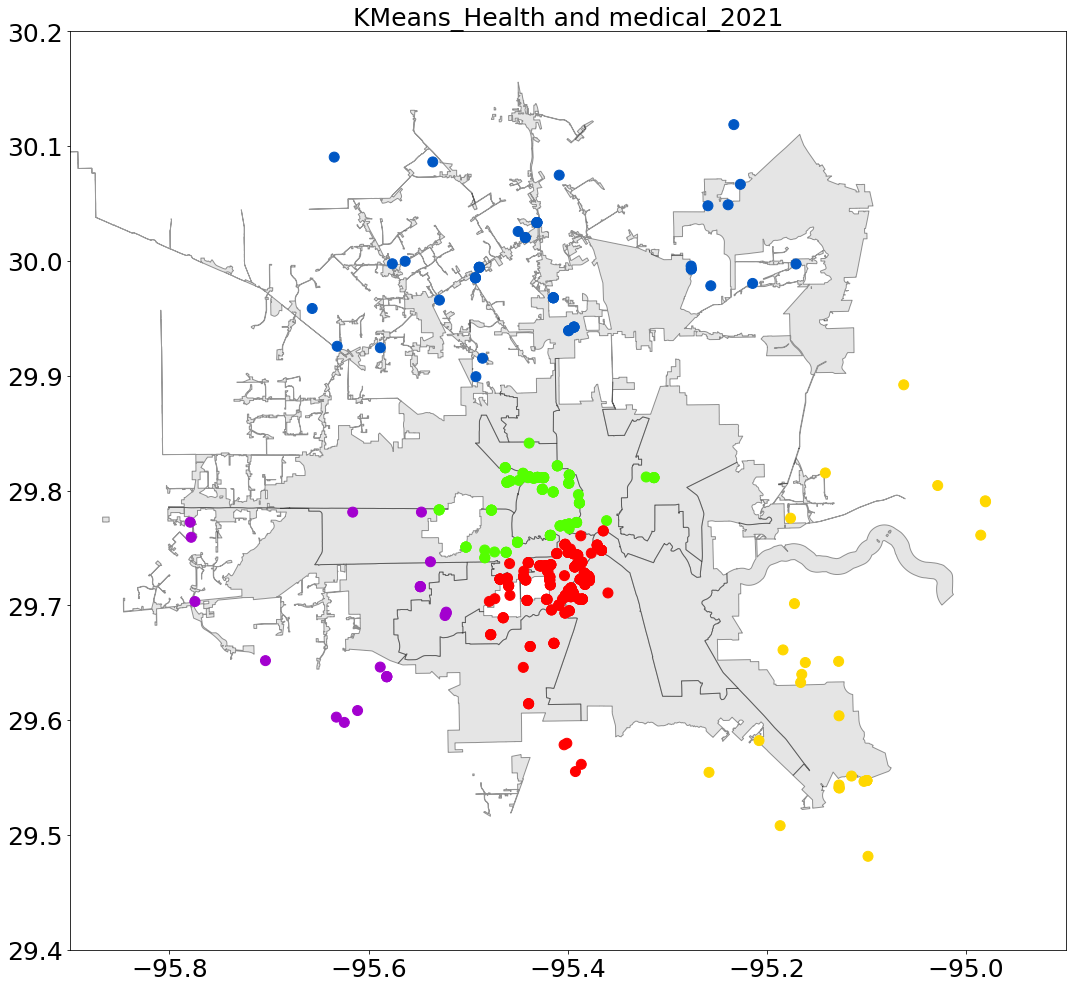

In [59]:
KMean_clust(clus_2021_3,5,title='KMeans_Health and medical_2021')

silhouette_score for KMeans_Transportation_2021 is: 0.4908939825511371


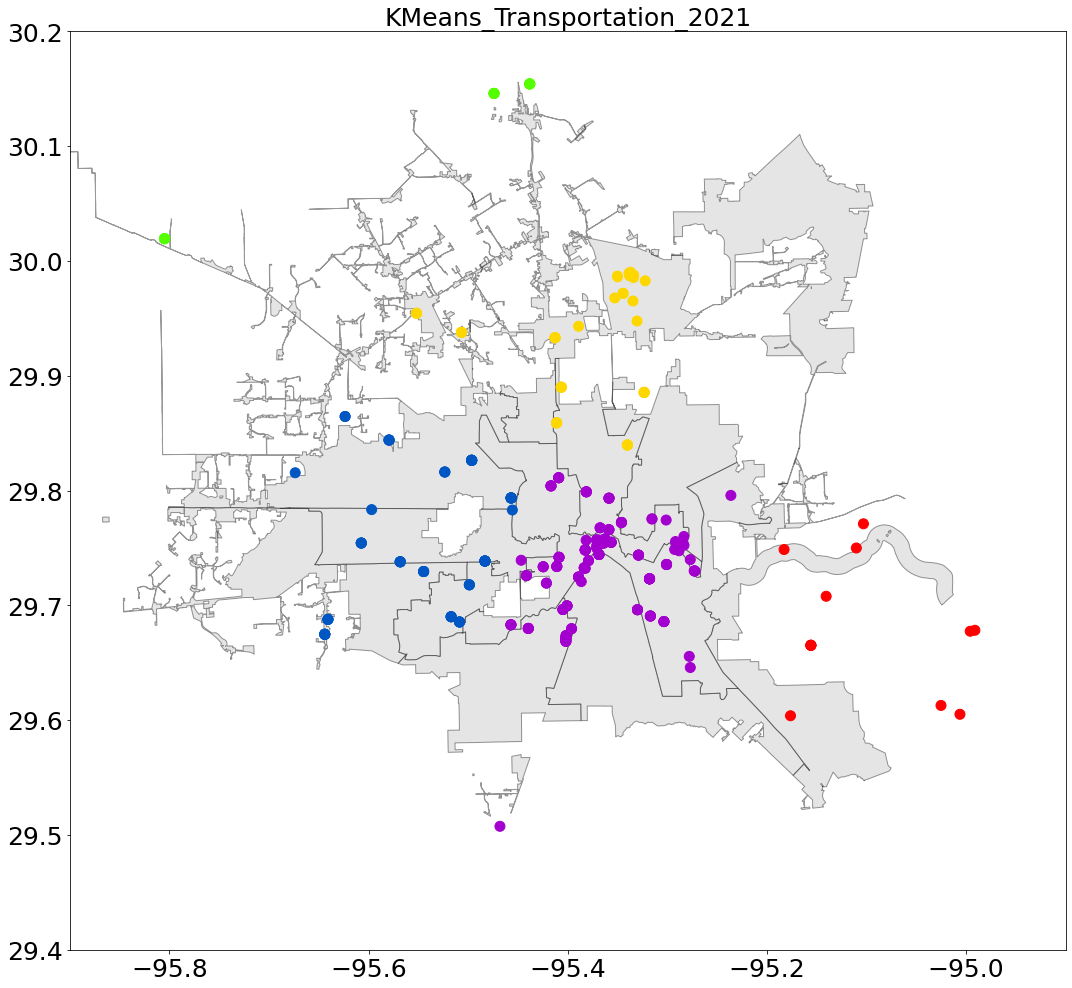

In [60]:
KMean_clust(clus_2021_6,5,title='KMeans_Transportation_2021')

silhouette_score for KMeans_Food, water, sheltering_Comprehensive_2021 is: 0.3971422949090151


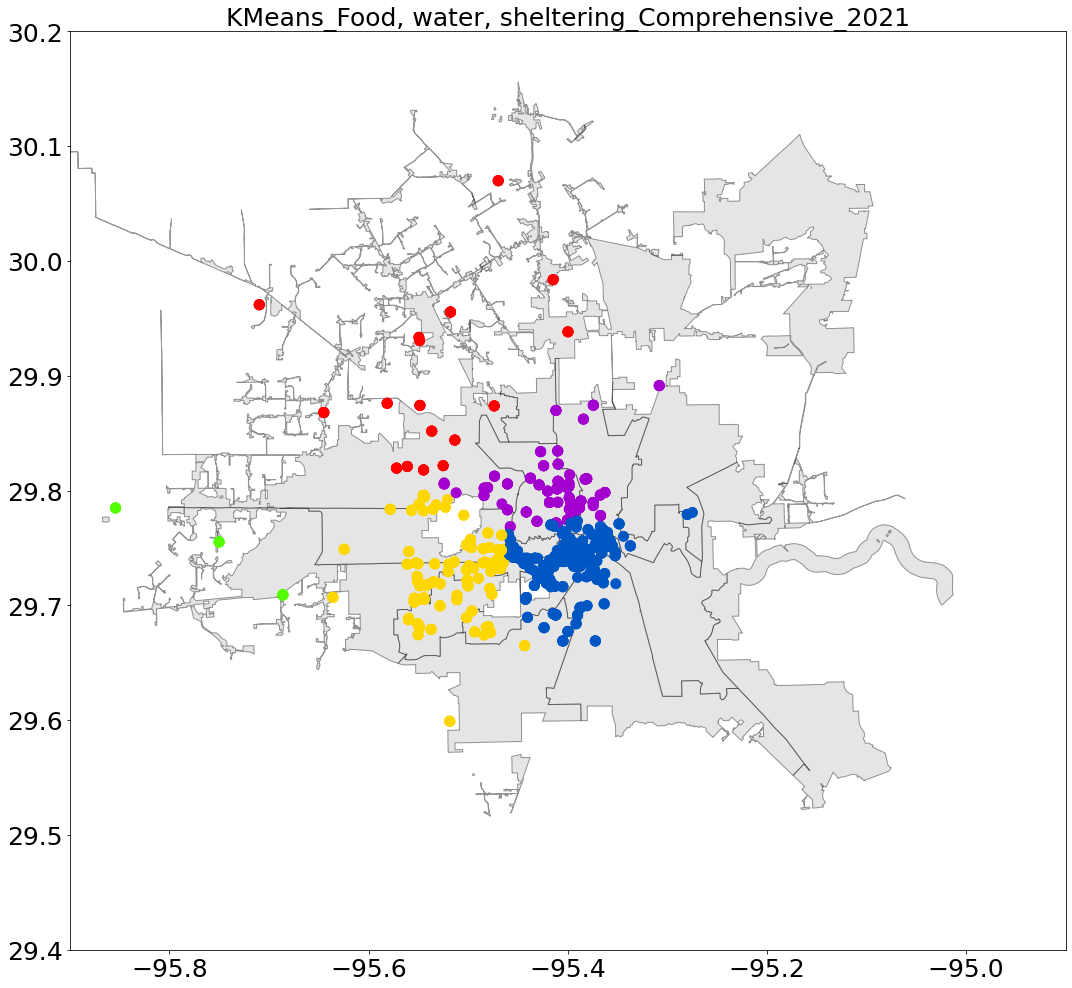

In [61]:
KMean_clust(clus_2021_new_2,5,title='KMeans_Food, water, sheltering_Comprehensive_2021')

silhouette_score for KMeans_Health and medical_Comprehensive_2021 is: 0.40471535475901677


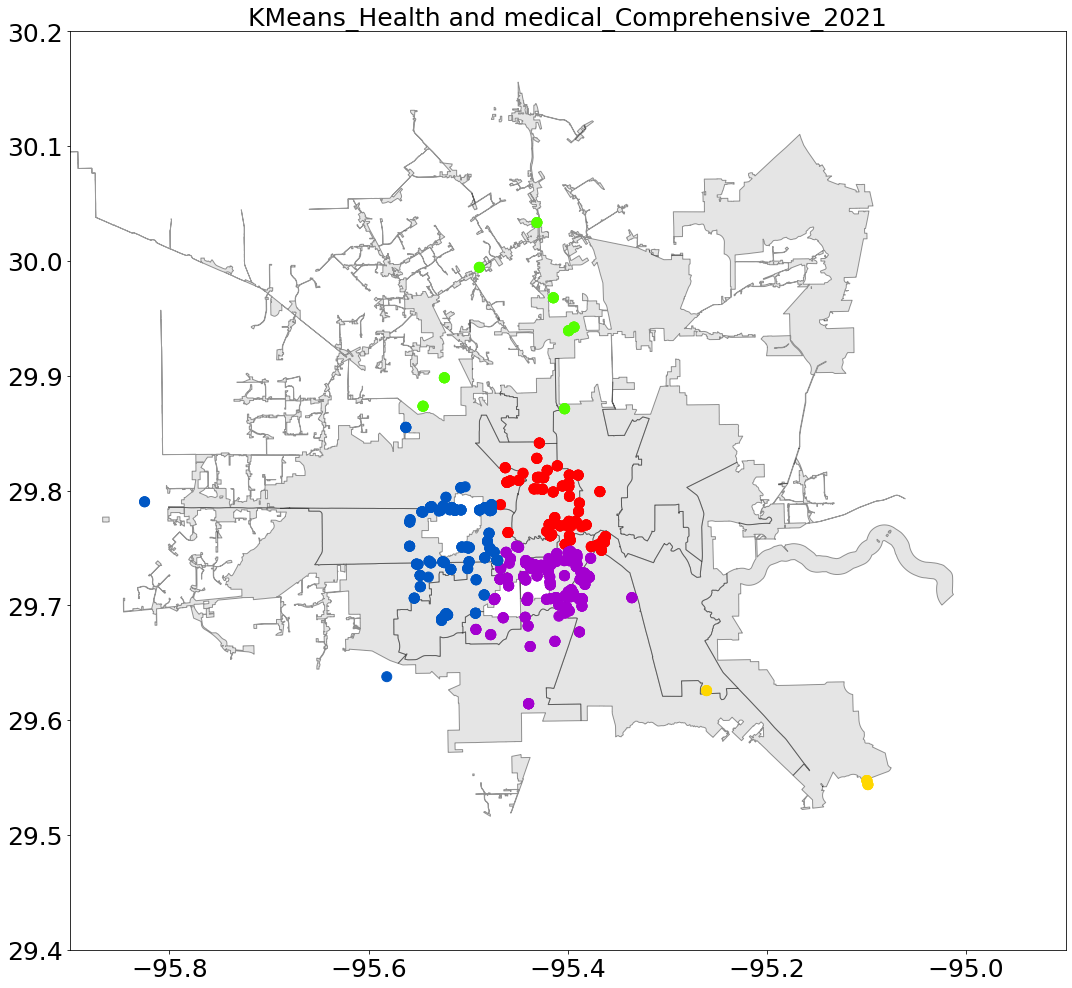

In [62]:
KMean_clust(clus_2021_new_3,5,title='KMeans_Health and medical_Comprehensive_2021')

silhouette_score for KMeans_Transportation_Comprehensive_2021 is: 0.4404308593860065


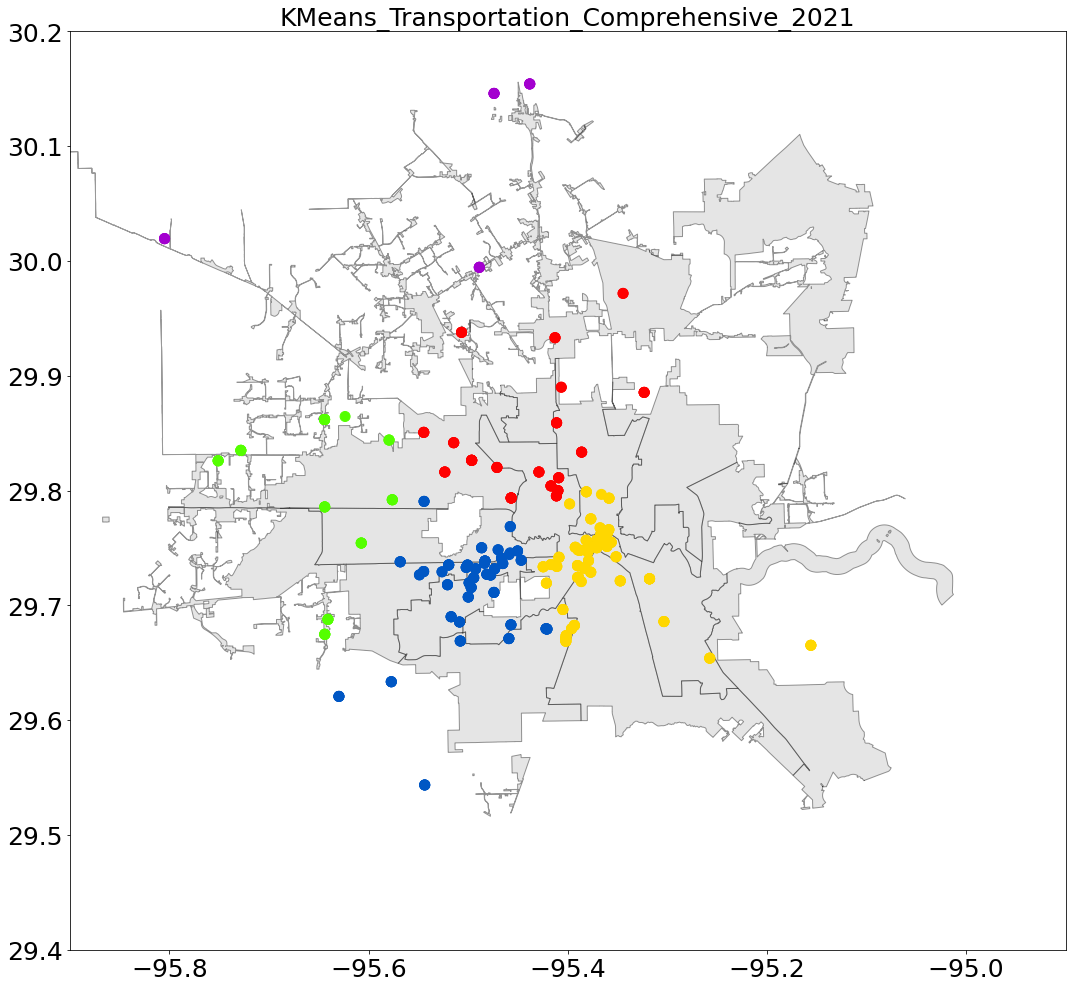

In [63]:
KMean_clust(clus_2021_new_6,5,title='KMeans_Transportation_Comprehensive_2021')

### DBSCAN Clustering

In [64]:
def DBScan_clust(df,eps=0.8,min_samples=3,title='title'):
    ss=StandardScaler()
    dbscan=DBSCAN(eps,min_samples)
    df_sc=ss.fit_transform(df)
    dbscan.fit(df_sc)
    print(f'DBScan silhouette_score for {title} is: {silhouette_score(df_sc,dbscan.labels_)}')
    
    fig,ax = plt.subplots(figsize=(15,15))
    houston_map.plot(ax=ax,alpha=0.4, color='silver',edgecolor='black')
    plt.scatter(df.longitude,df.latitude,c=dbscan.labels_,cmap='prism',s=100)
    plt.xlim(-95.9, -94.9)
    plt.ylim(29.4, 30.2)
    plt.title(title,fontsize=25)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.tight_layout()
    #plt.axis('off')
    plt.tight_layout()
    plt.savefig('Final_images/'+title, dpi=600);

C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass min_samples=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


DBScan silhouette_score for DBScan_Food, water, sheltering_2019 is: 0.5907924457728201


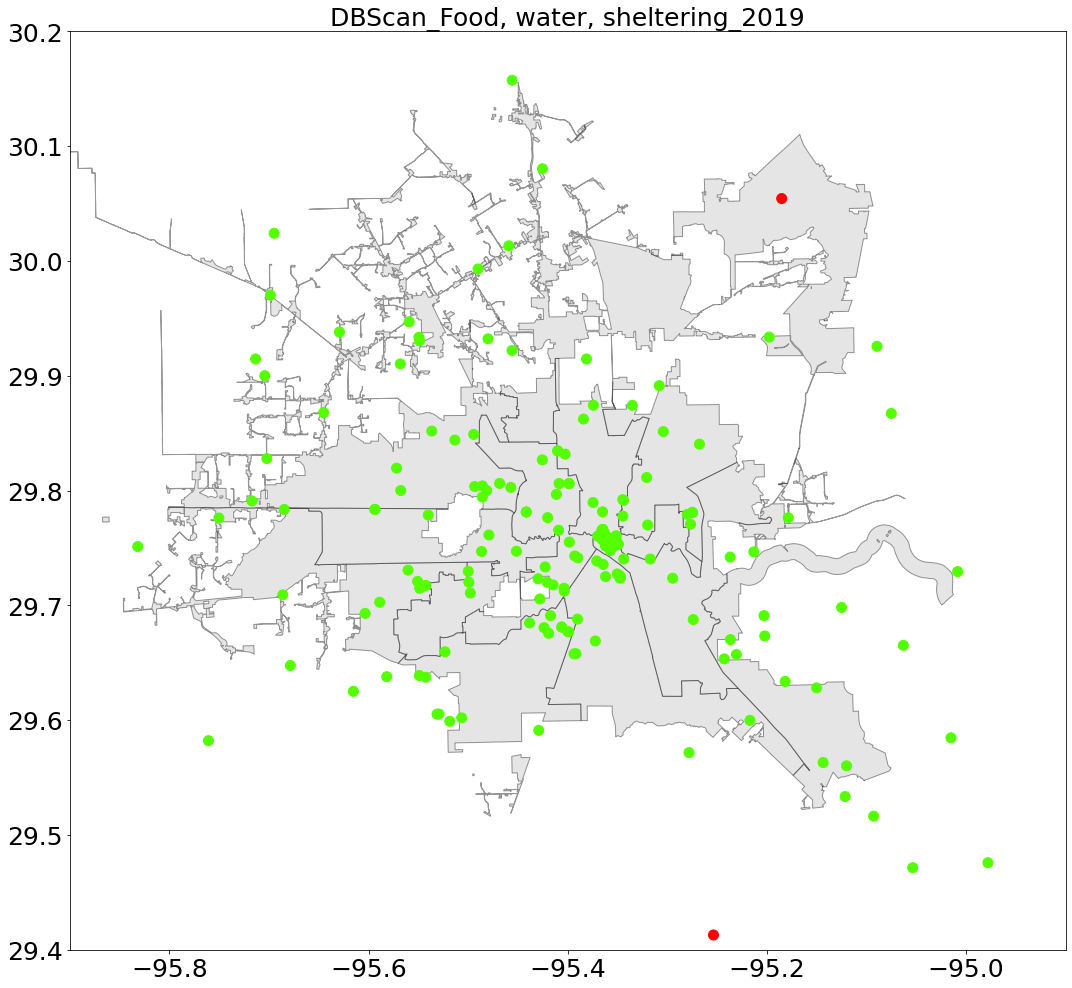

In [65]:
DBScan_clust(clus_2019_2,title='DBScan_Food, water, sheltering_2019')

C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass min_samples=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


DBScan silhouette_score for DBScan_Health and medical_2019 is: 0.45782133641799955


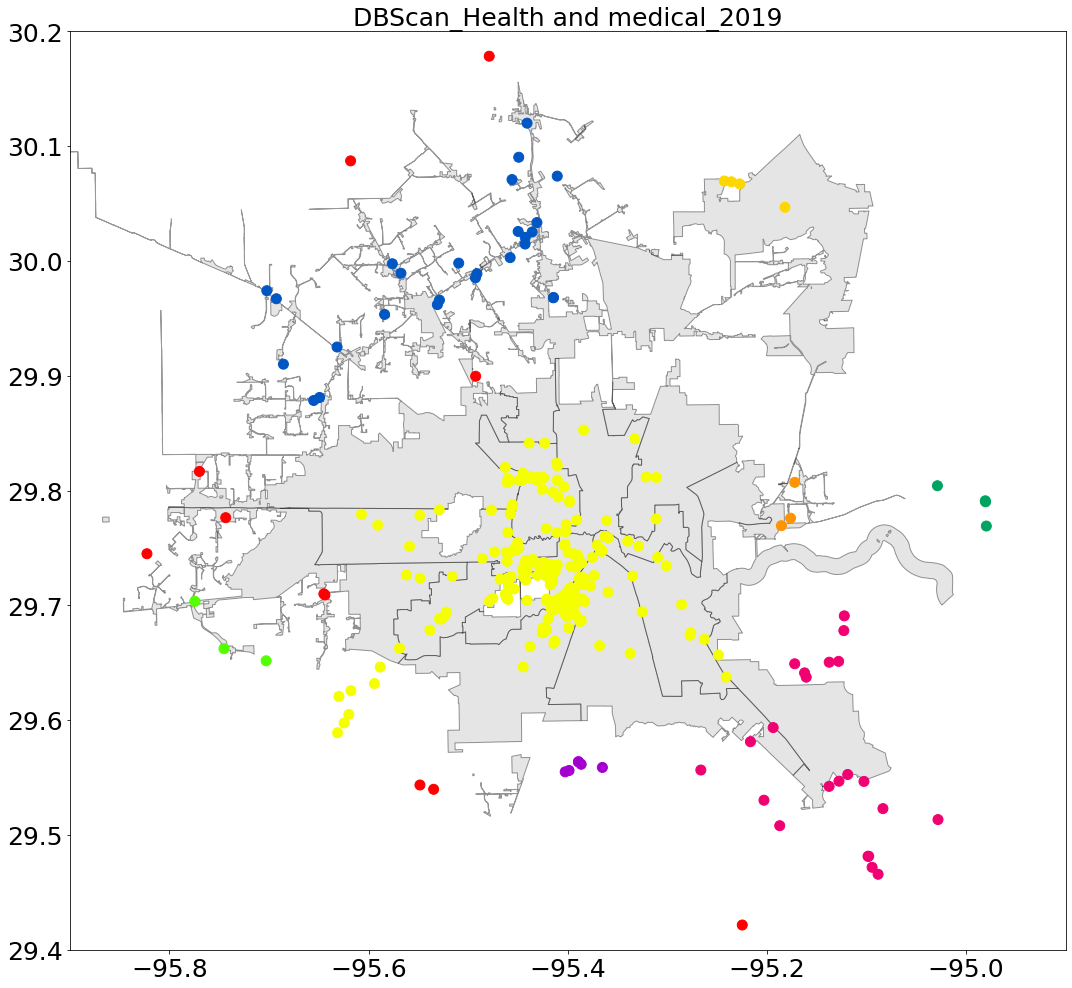

In [66]:
DBScan_clust(clus_2019_3,eps=0.5,min_samples=3,title='DBScan_Health and medical_2019')

C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass min_samples=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


DBScan silhouette_score for DBScan_Transportation_2019 is: 0.5509699463491208


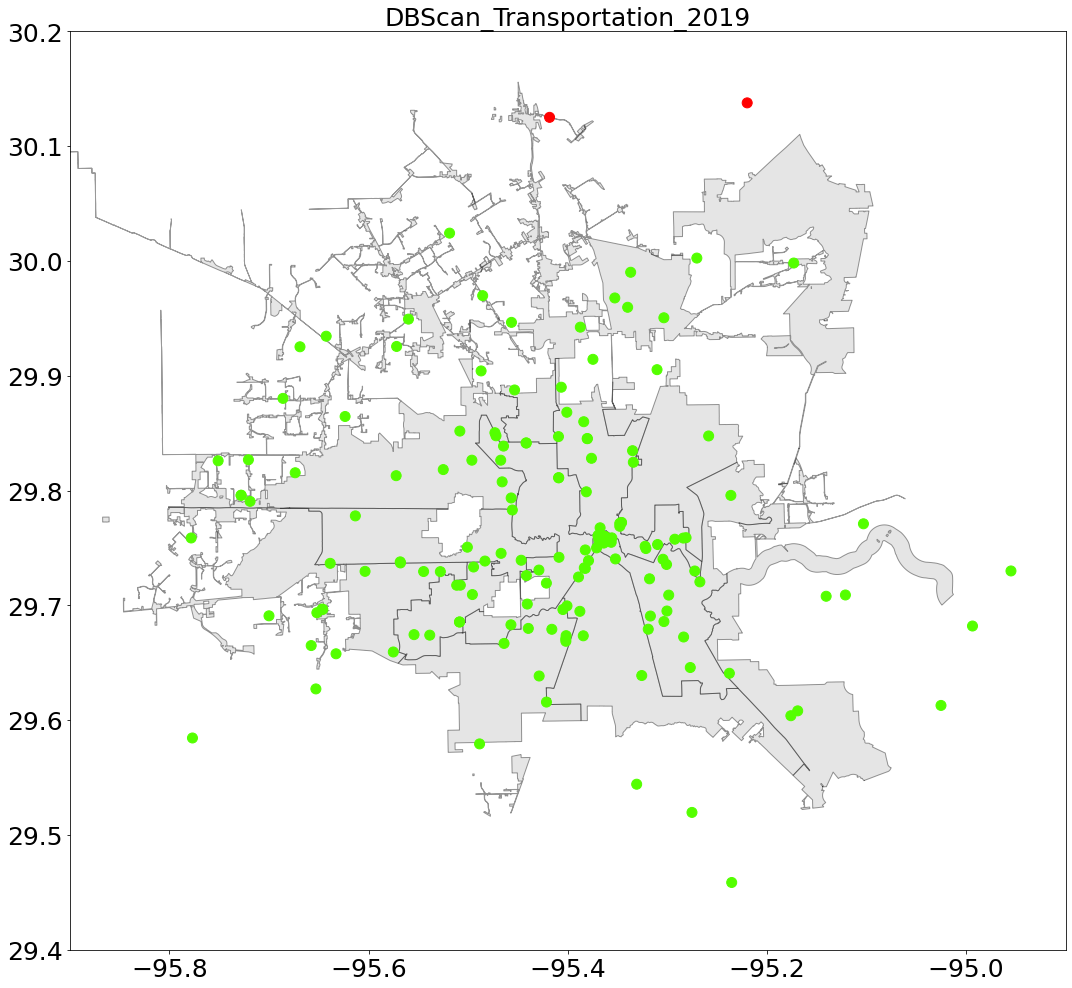

In [67]:
DBScan_clust(clus_2019_6,eps=0.9,min_samples=3,title='DBScan_Transportation_2019')

C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass min_samples=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


DBScan silhouette_score for DBScan_Food, water, sheltering_2021 is: 0.22827592300585403


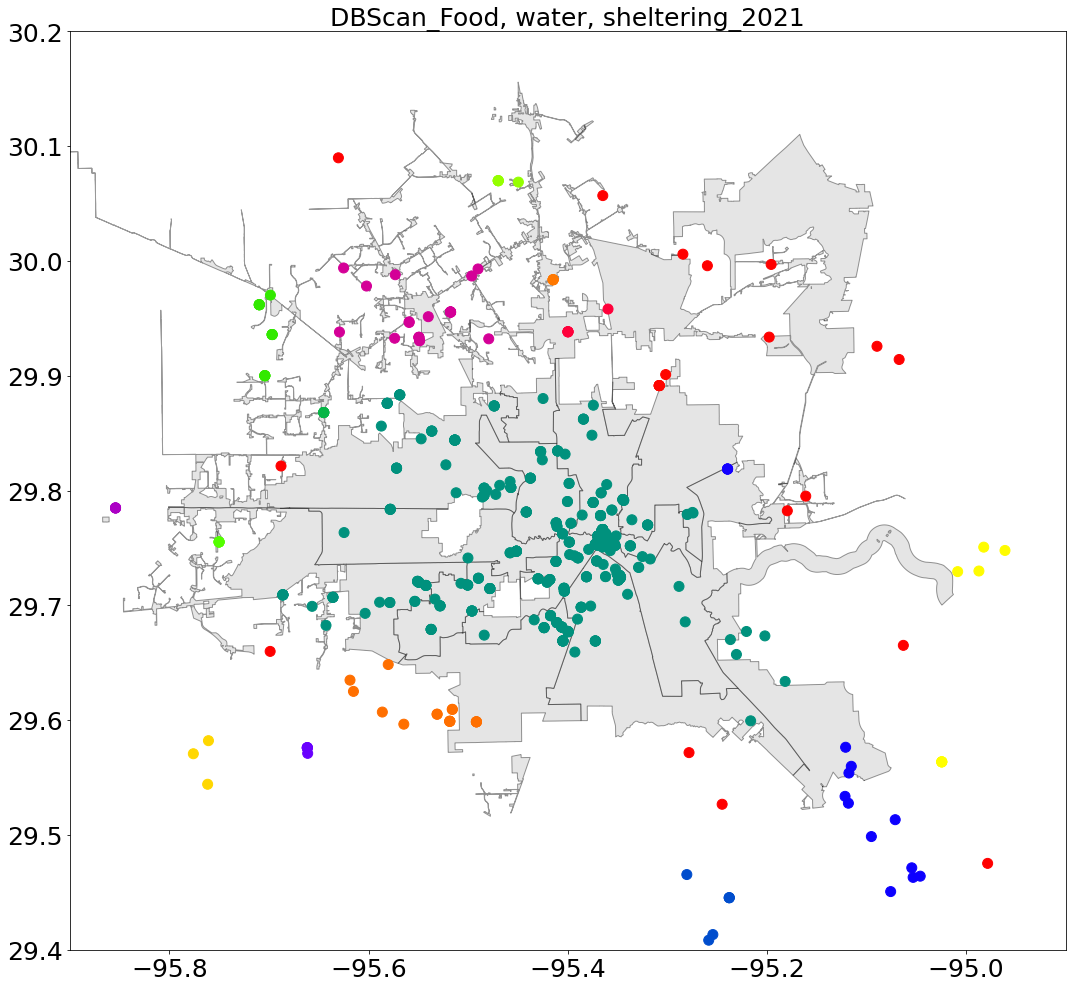

In [68]:
DBScan_clust(clus_2021_2,eps=0.4,title='DBScan_Food, water, sheltering_2021')

C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass min_samples=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


DBScan silhouette_score for DBScan_Health and medical_2021 is: 0.6147768842835101


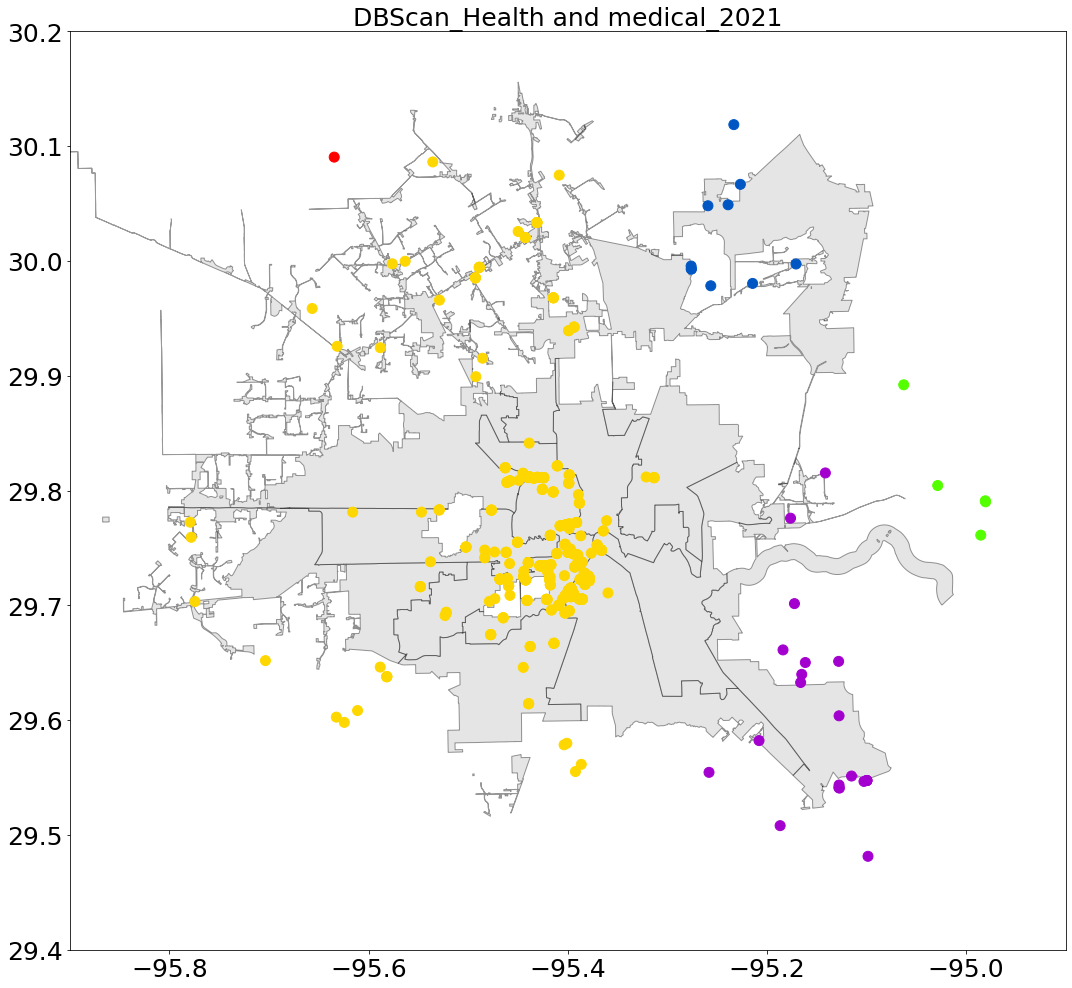

In [69]:
DBScan_clust(clus_2021_3,eps=1,title='DBScan_Health and medical_2021')

C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass min_samples=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


DBScan silhouette_score for DBScan_Transportation_2021 is: 0.3180546246288416


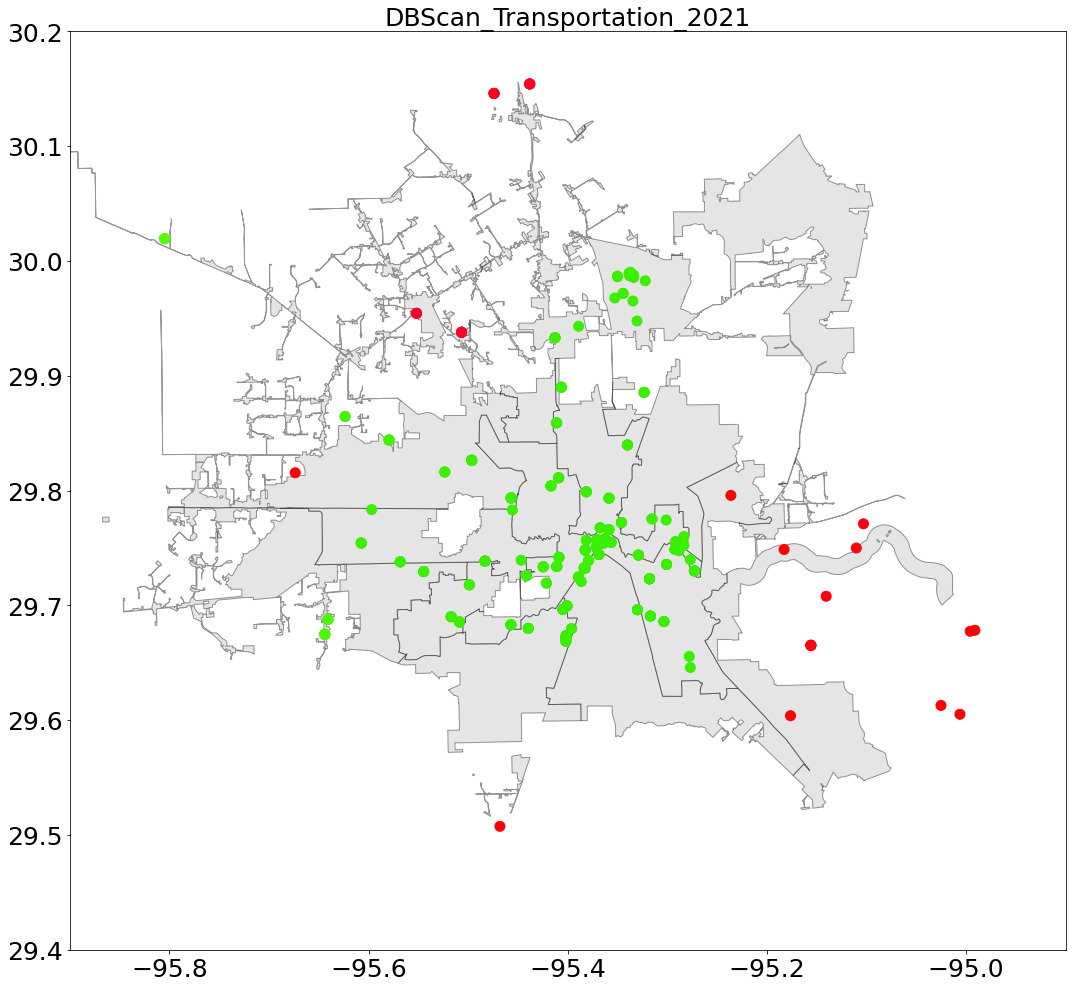

In [70]:
DBScan_clust(clus_2021_6,eps=0.5,title='DBScan_Transportation_2021')

C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass min_samples=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


DBScan silhouette_score for DBScan_Food, water, sheltering_Comprehensive_2021 is: 0.18866640094108236


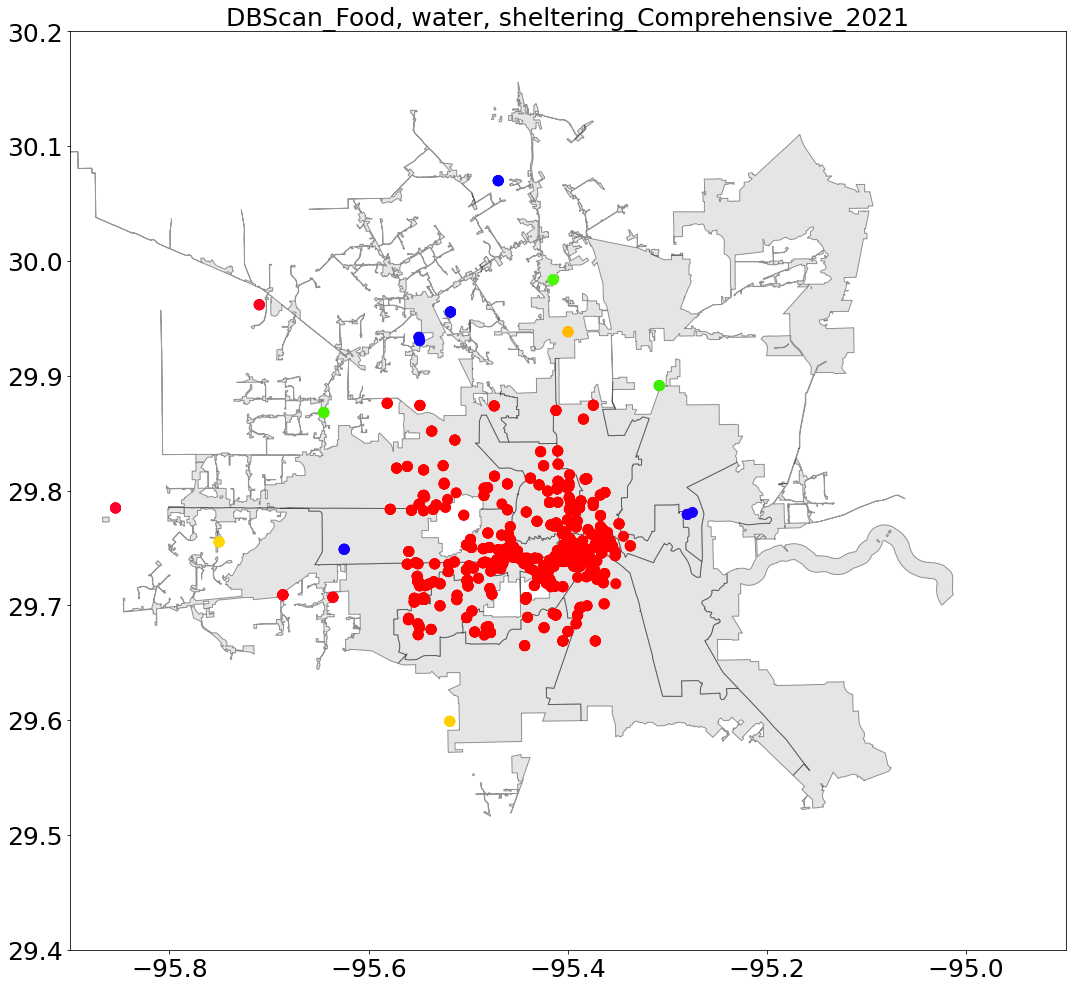

In [71]:
DBScan_clust(clus_2021_new_2,eps=0.75,title='DBScan_Food, water, sheltering_Comprehensive_2021')

C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass min_samples=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


DBScan silhouette_score for DBScan_Health and medical_Comprehensive_2021 is: 0.4728086554217056


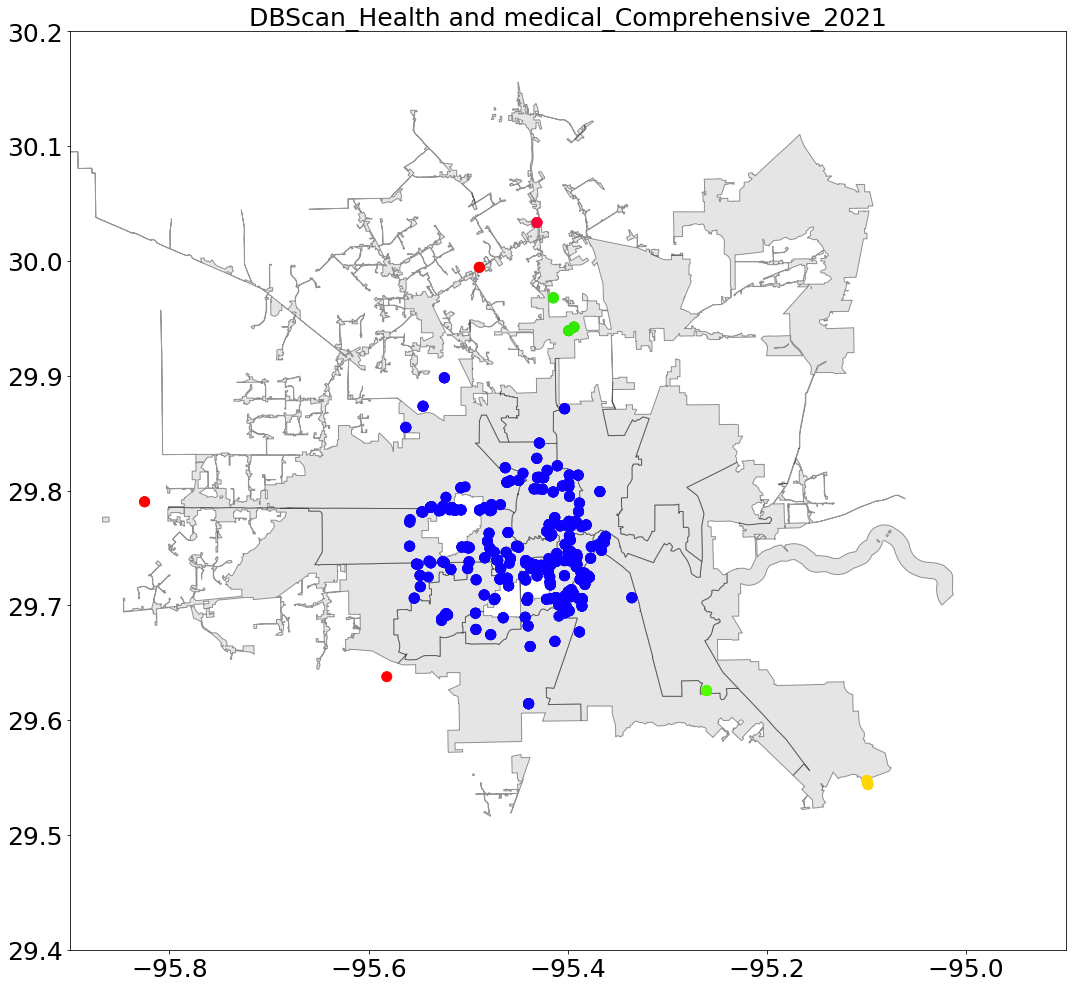

In [72]:
DBScan_clust(clus_2021_new_3,eps=1,title='DBScan_Health and medical_Comprehensive_2021')

C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass min_samples=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


DBScan silhouette_score for DBScan_Transportation_Comprehensive_2021 is: 0.4806827949986258


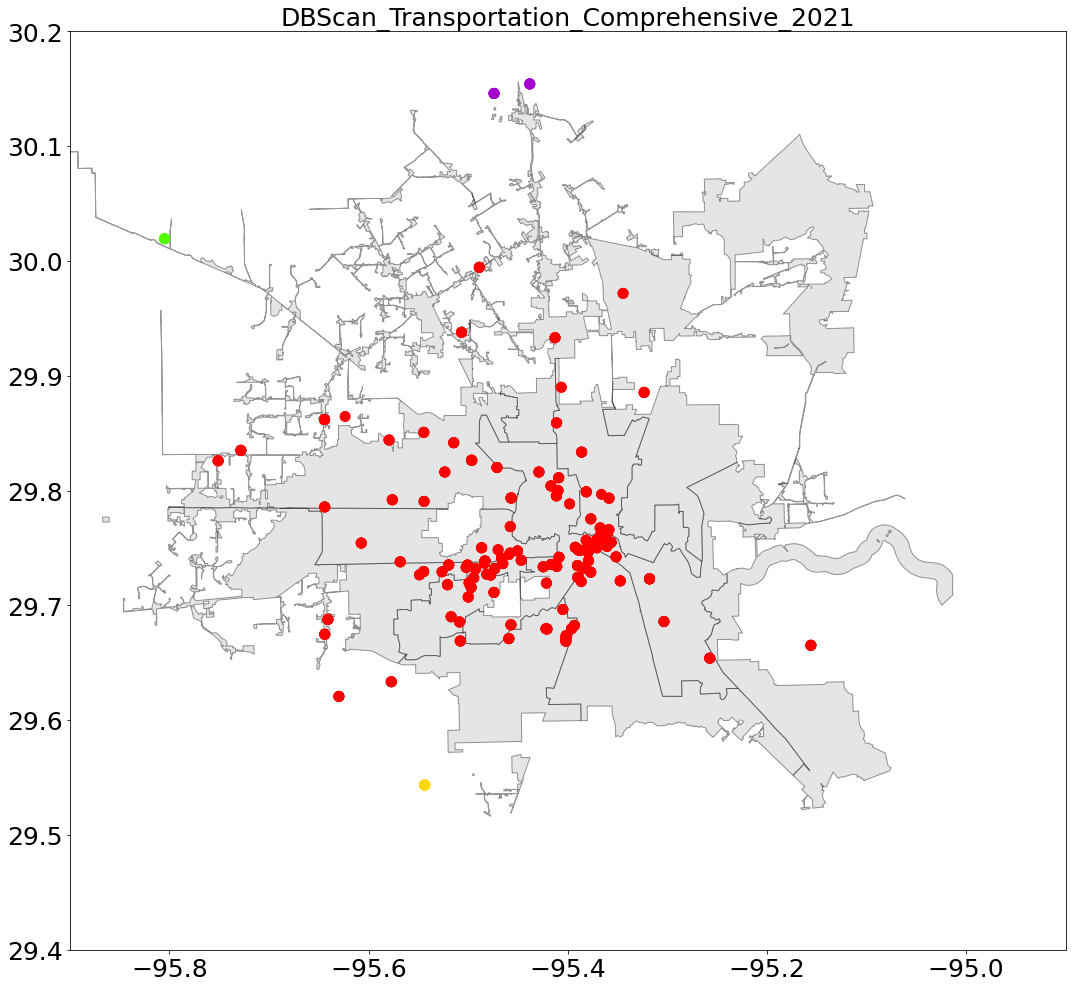

In [73]:
DBScan_clust(clus_2021_new_6,eps=1,title='DBScan_Transportation_Comprehensive_2021')

## Population Data

In [74]:
# In this section, population of Houston is clustered and mapped using geopandas.

df_pop=pd.read_csv("houstonpopulationdata.csv")
df_pop.head()

Unnamed: 0  index    zip       lat       lng     city state_id state_name  \
0           0  26648  77002  29.75641 -95.36530  Houston       TX      Texas   
1           1  26649  77003  29.74932 -95.34582  Houston       TX      Texas   
2           2  26650  77004  29.72463 -95.36309  Houston       TX      Texas   
3           3  26651  77005  29.71816 -95.42419  Houston       TX      Texas   
4           4  26652  77006  29.74088 -95.39132  Houston       TX      Texas   

   population  density  
0     15613.0   2995.6  
1      9707.0   1476.3  
2     37294.0   2491.4  
3     28572.0   2869.1  
4     22580.0   3865.9

In [75]:
df_pop=df_pop[['lat','lng','population','density']]
df_pop.head()

lat       lng  population  density
0  29.75641 -95.36530     15613.0   2995.6
1  29.74932 -95.34582      9707.0   1476.3
2  29.72463 -95.36309     37294.0   2491.4
3  29.71816 -95.42419     28572.0   2869.1
4  29.74088 -95.39132     22580.0   3865.9

In [76]:
pop_gdf=gpd.GeoDataFrame(df_pop,geometry=gpd.points_from_xy(df_pop.lng,df_pop.lat),crs=crs)
pop_gdf['density'].describe()

C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


count      97.000000
mean     1828.053608
std      1002.056515
min         0.000000
25%      1174.400000
50%      1699.600000
75%      2419.700000
max      6597.400000
Name: density, dtype: float64

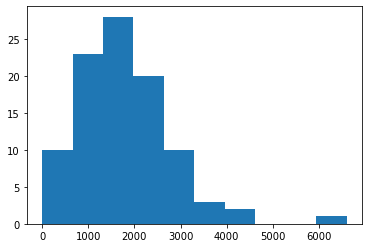

In [77]:
plt.hist(pop_gdf['density'],bins=10);


In [78]:
def population_clustering(df_pop):
    j=1
#     df=pd.DataFrame(0,index=df_pop.index,columns=df_pop.columns)
    df=df_pop[df_pop['density'].between(4200,6600)]
    df['cluster']=8
    for i in range(0,4200,600):
        B=df_pop[df_pop['density'].between(i,i+600)]
        B['cluster']=j
        j+=1
        df=df.append(B)
    return df

In [79]:
pop_gdf=population_clustering(pop_gdf)

C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
C:\ProgramData\Anaconda3\envs\geo\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

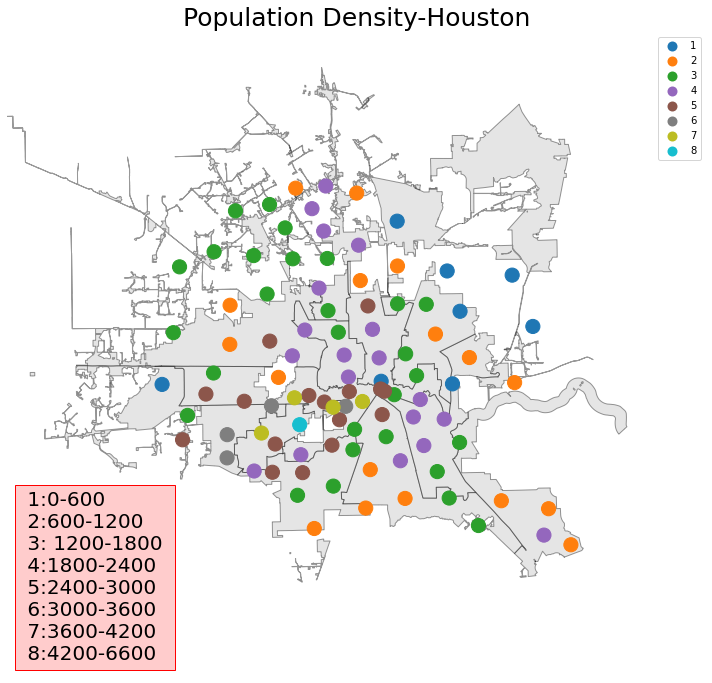

In [80]:
fig,ax = plt.subplots(figsize=(10,10))
houston_map.plot(ax=ax,alpha=0.4, color='silver',edgecolor='black')
pop_gdf.plot(ax=ax,column='cluster',markersize=200 ,categorical=True,legend=True)
plt.text(-95.88,29.42," 1:0-600 \n 2:600-1200 \n 3: 1200-1800 \n 4:1800-2400 \n 5:2400-3000 \n 6:3000-3600 \n 7:3600-4200 \n 8:4200-6600",
         fontsize=20,color='black',bbox=dict(boxstyle="square",ec=(1., 0, 0),fc=(1,0.8,0.8)))
plt.xlim(-95.9, -94.9)
plt.ylim(29.4, 30.2)
plt.title('Population Density-Houston',fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.tight_layout()
plt.axis('off')
plt.tight_layout()
plt.savefig('Final_images/Population Density Houston', dpi=600);